# Project 1

### Problem 1

Write a code that calculates the trajectory of a soccer ball accounting for the drag force and
the wind. For the drag coefficient $(C = Cd)$, you may want to consult this NASA webpage.
Consider a few different values for the wind’s speed and direction. You may use the following
values for the ball’s diameter and weight, $d$ = 22 cm and $m$ = 0.420 kg, and for the density
of the air use $ \rho = 1.3 kg/m3. $

In [1]:
import numpy as np
import matplotlib.pyplot as plt


 
# Soccer ball and environment constants
diameter = 0.22             # meters
mass = 0.42                 # kg
density_air = 1.3           # kg/m^3
Cd = 0.25                    # Drag coefficient (you can adjust this value)
A = np.pi*(diameter/2.)**2.   # Cross-sectional area of soccer ball
g = 9.81  # m/s^2 (acceleration due to gravity)

# Initial Conditions
v0 = 30.
alpha = 0.5*Cd*A*density_air
wind_velocity = 1.
wind_angle = 0.
wind_velocity_x = wind_velocity*np.cos(np.deg2rad(wind_angle))
wind_velocity_y = wind_velocity*np.sin(np.deg2rad(wind_angle))
w = [wind_velocity_x, wind_velocity_y]
launch_angle = 45.
x0 = 0.
y0 = 0.

# Simulation time step and time vector
nstep = 100000
t = np.linspace(0., 50., nstep)
dt = t[1]-t[0]

# Initialize vectors
x = x0
y = x0
x_graph = np.zeros_like(t)
y_graph = np.zeros_like(t)
x_graph[0] = x
y_graph[0] = y

v_x = v0 * np.cos(np.deg2rad(launch_angle))
v_y = v0 * np.sin(np.deg2rad(launch_angle))
v = [v_x, v_y]
v_magnitude = np.sqrt(v[0]**2+v[1]**2)

a = [0.,-g]

F = [a[0]*mass, a[1]*mass]
F_drag = [alpha*(v_magnitude**2)*-v[0], alpha*(v_magnitude**2)*-v[1]]
F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]

In [2]:
# Main loop
i = 0
while y_graph[i] >= 0:    
    rel_v= [v[0]-w[0], v[1]-w[1]]
    v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
    unit_v = rel_v/v_magnitude
    F_drag = (alpha*(v_magnitude**2))*-unit_v
    F = [a[0]*mass, a[1]*mass]
    F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
    v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
    x = x + v[0]*dt
    y = y + v[1]*dt
    x_graph[i+1] = x
    y_graph[i+1] = y
    i+=1

# put these values into a dict:
ball_and_environment_properties = {
    'diameter': 0.22,             # meters
    'mass': 0.42,                 # kg
    'density_air': 1.3,           # kg/m^3
    'Cd': 0.25,                   # Drag coefficient (you can adjust this value)
    'g': 9.81,                    # Acceleration due to gravity (m/s^2)
}
# functions for initializing the vectors
def wind(wind_velocity:float,wind_angle:float):
    wind_velocity_x = wind_velocity*np.cos(np.deg2rad(wind_angle))
    wind_velocity_y = wind_velocity*np.sin(np.deg2rad(wind_angle))
    w = np.array([wind_velocity_x, wind_velocity_y])
    return w

def velocity(v0:float,launch_angle:float):
    v_x = v0 * np.cos(np.deg2rad(launch_angle))
    v_y = v0 * np.sin(np.deg2rad(launch_angle))
    v = np.array([v_x, v_y])
    return v

def velocity_magnitude(v:np.ndarray):
    v_magnitude = np.sqrt(v[0]**2+v[1]**2)
    return v_magnitude

def velocity_unit_vector(v:np.ndarray,v_magnitude:float):
    unit_v = v/v_magnitude
    return unit_v

def acceleration(g: float):
    a = np.array([0,-g])
    return a

def force(a:np.ndarray,mass:float):
    F = np.array([a[0]*mass, a[1]*mass])
    return F

def net_force(F:np.ndarray,F_drag:np.ndarray):
    F_net = np.array([F[0]+F_drag[0], F[1]+F_drag[1]])
    return F_net

def drag_force(alpha:float,v_magnitude:float,unit_v:np.ndarray):
    F_drag = alpha*(v_magnitude**2)*-1*unit_v
    return F_drag

# create the loop above into a function
def soccer_ball_trajectory(
        x0 = 0,
        y0 = 0,
        v0 = 30,
        launch_angle = 30,
        ball_and_environment_properties= ball_and_environment_properties,
        wind_velocity = 0,
        wind_angle = 0):
    # Soccer ball and environment constants
    diameter = ball_and_environment_properties['diameter']
    mass = ball_and_environment_properties['mass']
    density_air = ball_and_environment_properties['density_air']
    Cd = ball_and_environment_properties['Cd']
    g = ball_and_environment_properties['g']
    A = np.pi*(diameter/2)**2   # Cross-sectional area of soccer ball

    # Initial Conditions
    nstep = 100000
    t = np.linspace(0., 60., nstep)
    alpha = 0.5*Cd*A*density_air
    w = wind(wind_velocity,wind_angle)
    v = velocity(v0,launch_angle)
    v_magnitude = velocity_magnitude(v)
    unit_v = velocity_unit_vector(v,v_magnitude)
    a = acceleration(g)
    F = force(a,mass)
    F_drag = drag_force(alpha,v_magnitude,unit_v)
    F_net = net_force(F,F_drag)
    x = x0
    y = y0
    x_graph = np.zeros_like(t)
    y_graph = np.zeros_like(t)
    x_graph[0] = x
    y_graph[0] = y
    i = 0
    while y_graph[i] >= 0:    
        rel_v = [v[0]-w[0], v[1]-w[1]]
        v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
        unit_v = rel_v/v_magnitude
        F_drag = alpha*(v_magnitude**2)*-unit_v
        F = [a[0]*mass, a[1]*mass]
        F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
        v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
        x = x + v[0]*dt
        y = y + v[1]*dt
        x_graph[i+1] = x
        y_graph[i+1] = y
        i+=1
    x_graph = x_graph[:i]
    y_graph = y_graph[:i]
    return x_graph,y_graph

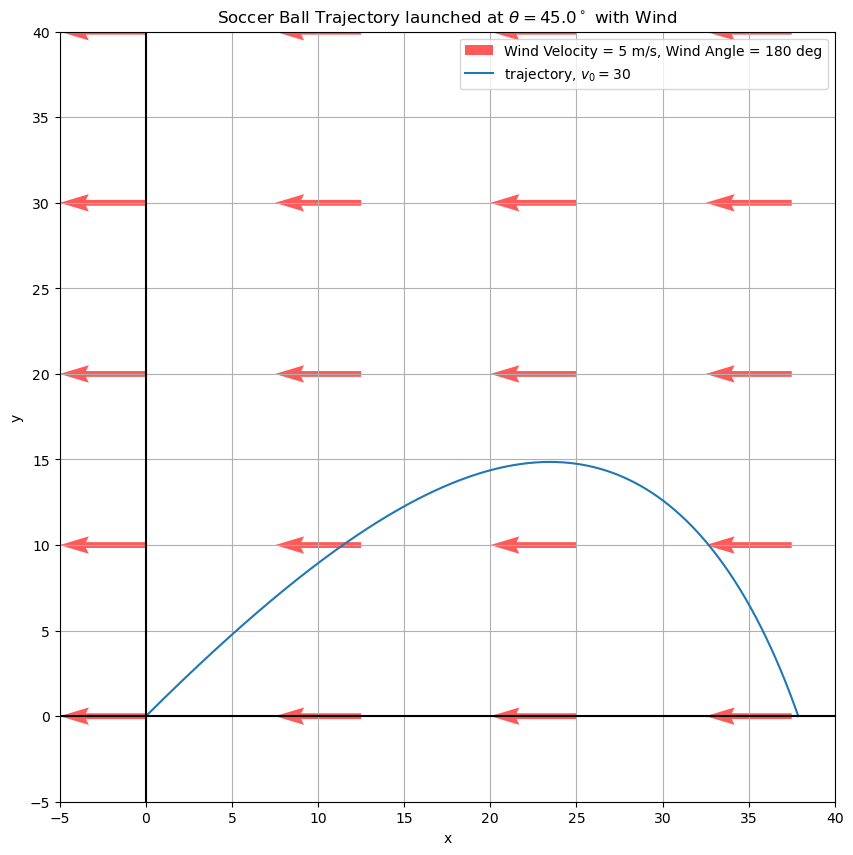

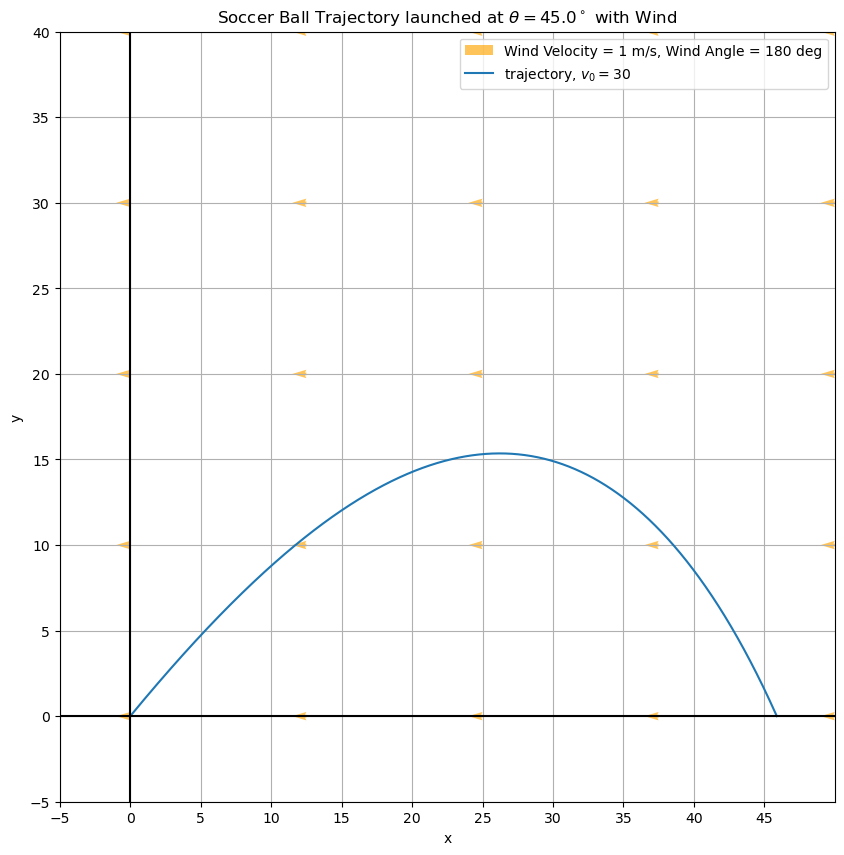

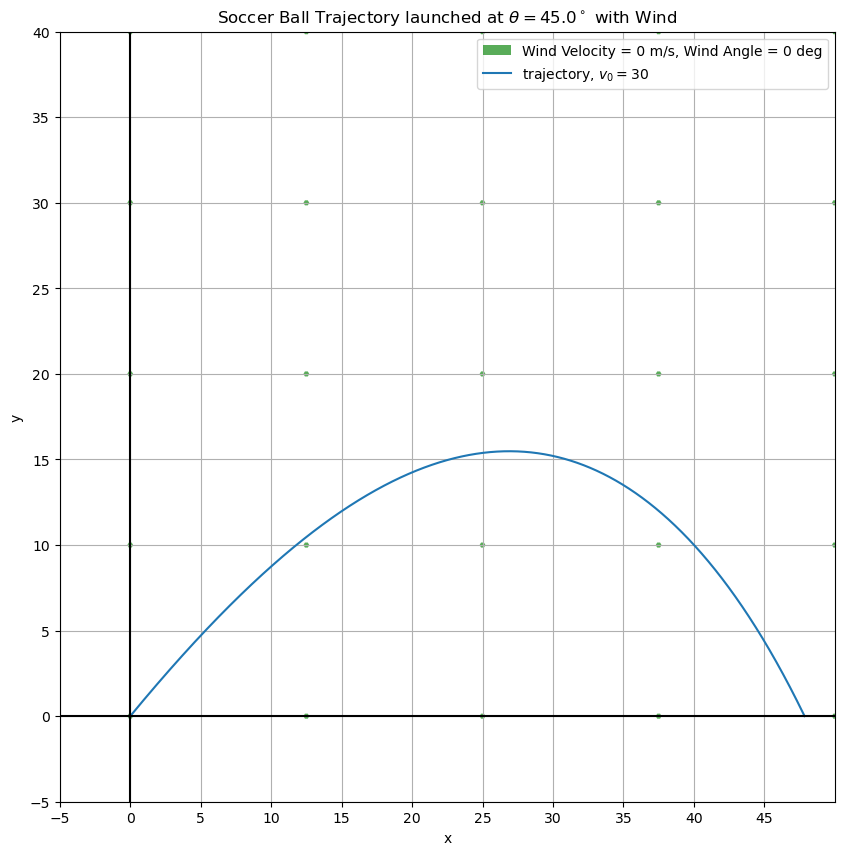

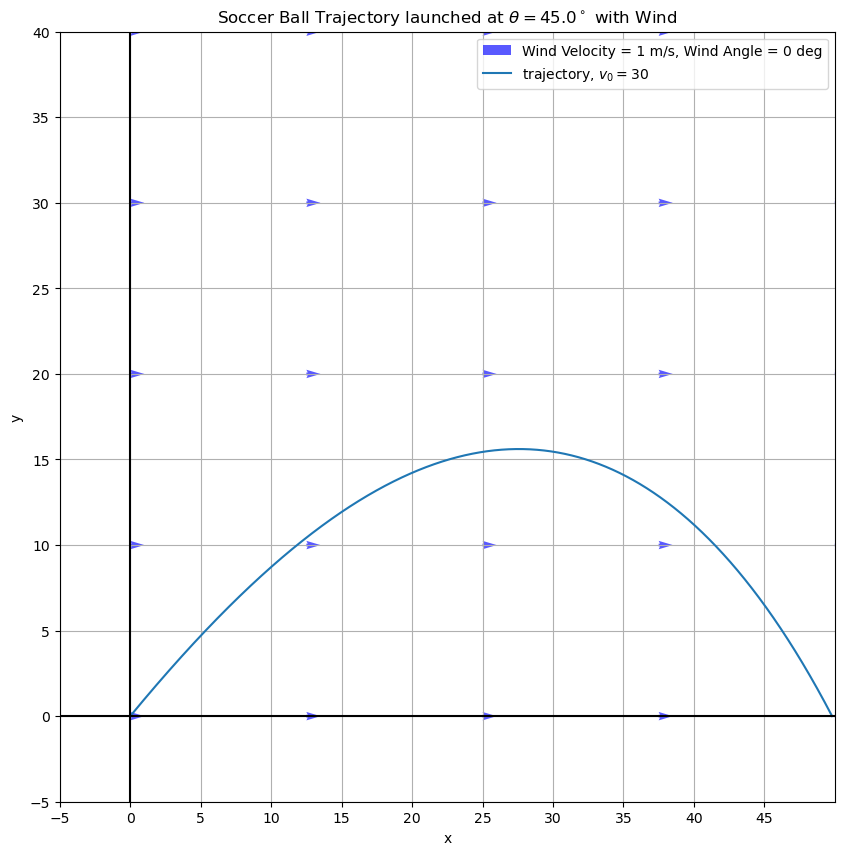

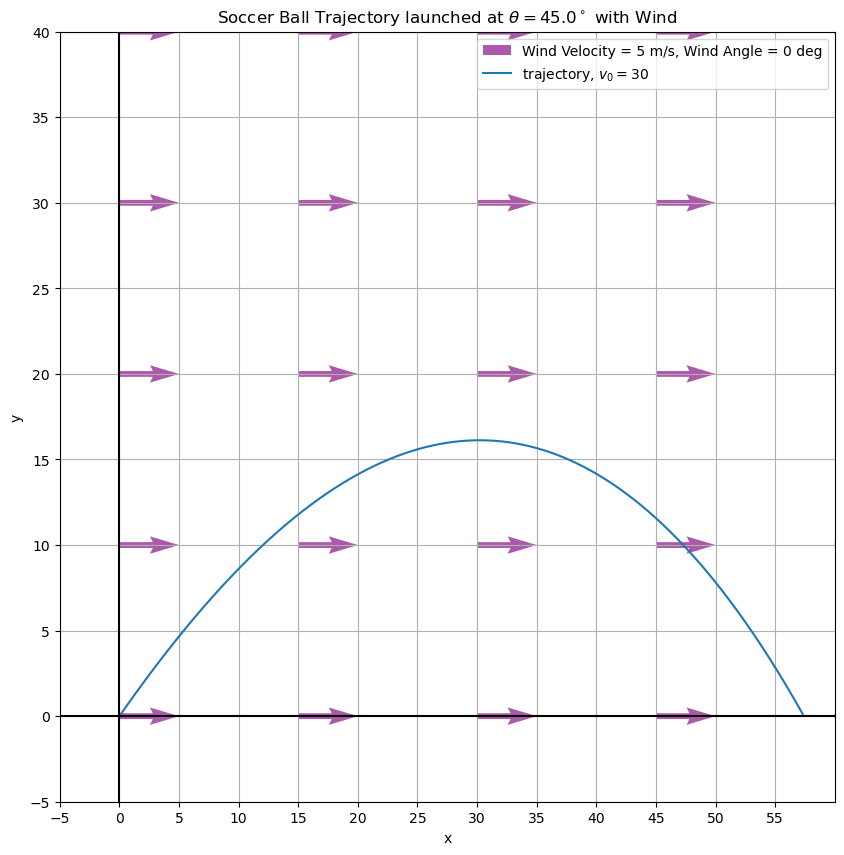

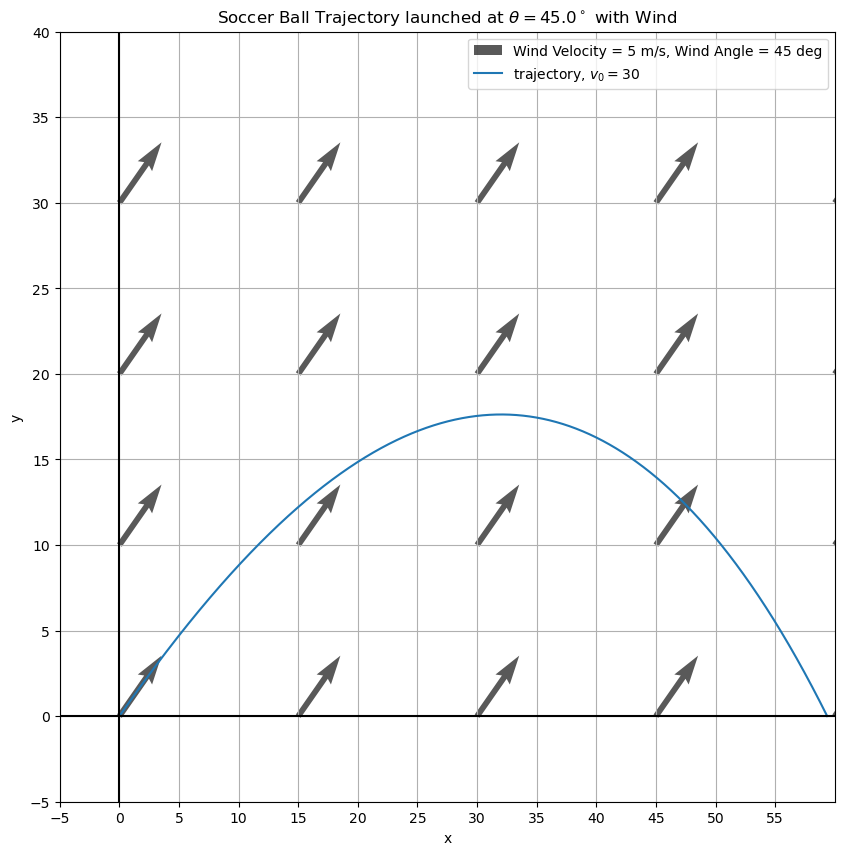

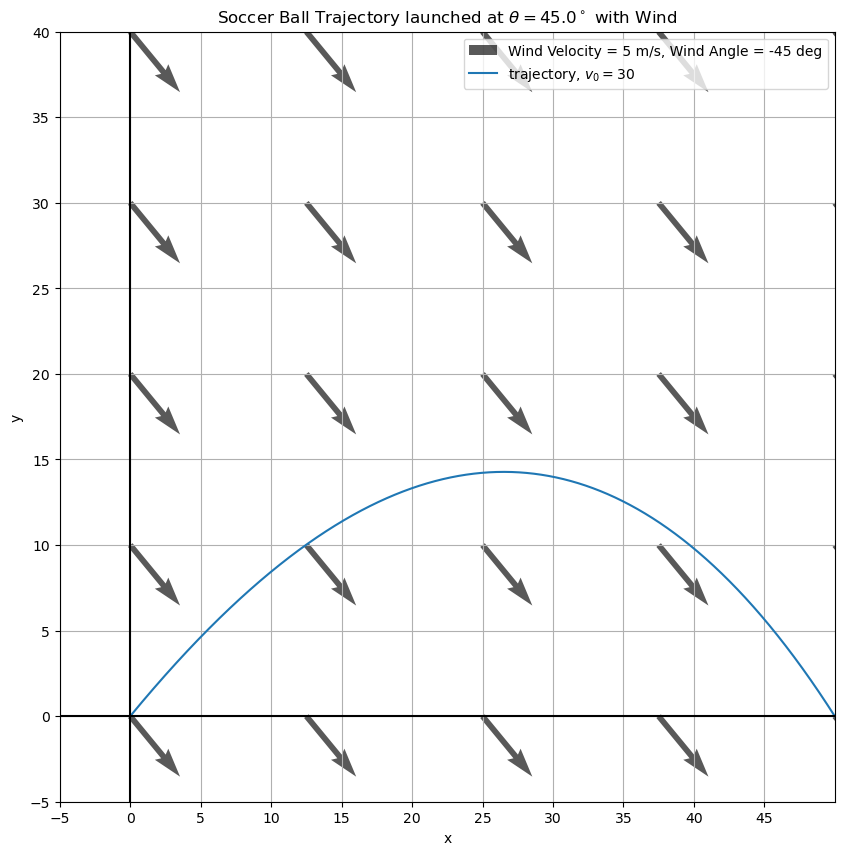

In [3]:
# Graphing bounds
wind_velocities = [5,1,0,1,5,5,5] # you can change this to any value
wind_colors = ['red','orange','green','blue','purple','black','black']
wind_angles = [180,180,0,0,0,45,-45]

for wind_velocity,wind_color,wind_angle in zip(wind_velocities, wind_colors,wind_angles):
    w = wind(wind_velocity,wind_angle)
    plt.figure(figsize=(10,10))
    x_graph,y_graph = soccer_ball_trajectory(x0,y0,v0, launch_angle, ball_and_environment_properties,wind_velocity,wind_angle)

    x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
    y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
    x_floor = int(np.floor(x_graph[-1]/5)*5)
    y_floor = int(np.floor(y_graph[-1]/5)*5)
    # create grid
    X = np.linspace(min(0,x_floor), max(50,x_ceiling), 5)
    Y = np.linspace(min(0,y_floor), max(40,y_ceiling), 5)
    Y, X = np.meshgrid(Y, X)
    U = np.ones_like(X)*w[0]
    V = np.ones_like(Y)*w[1]


    # plot wind vector field
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
            alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')

    # plot trajectory
    plt.plot(x_graph, y_graph, label = 'trajectory, $v_0 = 30\frac{{m}}{{s}}$')
    plt.xticks(np.arange(-5, max(50,x_ceiling), step=5))
    plt.yticks(np.arange(-5, max(40,40+y_ceiling), step=5))
    plt.title(f'Soccer Ball Trajectory launched at $\\theta = ${launch_angle}$^\circ$ with Wind')
    plt.xlim(-5, x_ceiling)
    plt.ylim(-5, max(40,y_ceiling))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

Trajectory is the path of a projectile through space over time. The trajectory of a projectile is determined by the initial velocity, launch angle, and acceleration due to gravity. The trajectory of a projectile through air with wind given an initial ball velocity $v_0$, a launch angle $\theta$, wind velocity $v_{w}$, and wind direction $\theta_w$ can be calculated using the following equations:

$$
\begin{align}
    v_{0_x} &= v_0\cos(\theta) \\
    v_{0_y} &= v_0\sin(\theta) \\
    x(t) &= v_{0x}t \\
    y(t) &= v_{0y}t - \frac{1}{2}gt^2 \\
    v_x(t) &= v_{0x} \\
    v_y(t) &= v_{0y} - gt \\

    \vec{v}_{wind} &= v_{w}\cos(\theta_w)\hat{i} + v_{w}\sin(\theta_w)\hat{j} \\
    \vec{v}(t) &= v_x(t) + v_y(t) - (v_{wind_x}(t)+v_{wind_y}(t))\\
    v(t) &= \sqrt{v_x^2(t) + v_y^2(t)} \\
    \hat{v} &= \frac{\vec{v}(t)}{v(t)} \\

    \vec{F_{drag}} &= \frac{1}{2}C_d\rho A v^2 \hat{v} \\
    \vec{F_{gravity}} &= -mg\hat{j} \\
    \vec{F_{net}} &= \vec{F_{drag}} + \vec{F_{gravity}} \\
    \vec{a} &= \frac{F_{net}}{m} \\

    \vec{v}(t+dt) &= \vec{v}(t) + \vec{a}dt \\
    v_{x}(t+dt) &= v_{x}(t)+ a_{x}(t)dt \\
    v_{y}(t+dt) &= v_{y}(t) + a_{y}(t)dt\\

    \vec{r}(t+dt) &= \vec{r}(t) + \vec{v}(t)dt \\
    x(t+dt) &= x(t) + v_x(t)dt \\
    y(t+dt) &= y(t) + v_y(t)dt \\

    
    
    

\end{align}
$$

where $v_{0x}$ is the initial velocity in the x-direction, $v_{0y}$ is the initial velocity in the y-direction, $v_{wind_x}$ is the wind velocity in the x-direction, $v_{wind_y}$ is the wind velocity in the y-direction, $v_x$ is the velocity in the x-direction, $v_y$ is the velocity in the y-direction, $v$ is the magnitude of the velocity, $\hat{v}$ is the unit vector of the velocity, $F_{drag}$ is the drag force, $F_{gravity}$ is the force due to gravity, $F_{net}$ is the net force, $a$ is the acceleration, $r$ is the position, $x$ is the position in the x-direction, $y$ is the position in the y-direction, $dt$ is the change in time, $C_d$ is the drag coefficient, $\rho$ is the density of air, $A$ is the cross-sectional area of the ball, $m$ is the mass of the ball, and $g$ is the acceleration due to gravity.

where $\theta$ is the launch angle of the soccer ball, $v_w$ is the wind speed, $\theta_w$ is the angle of the wind, $g$ is the acceleration due to gravity, $C_d$ is the drag coefficient, $\rho$ is the density of air, $A$ is the cross-sectional area of the ball, and $m$ is the mass of the ball.

These equations can be repesented in code as:

```python
    rel_v = [v[0]+w[0], v[1]+w[1]]
    v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
    unit_v = rel_v/v_magnitude
    F_drag = alpha*(v_magnitude**2)*-unit_v
    F = [a[0]*mass, a[1]*mass]
    F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
    v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
    x = x + v[0]*dt
    y = y + v[1]*dt

```

where line one of the snippit corresponds to equation $(8)$

### Problem 2

Professional soccer players kick the ball at an average speed of up to 30 m/s. Write a code
that calculates the maximum range and maximum height of the ball as a function of the
launching angle. Compare your results with and without drag force and wind.

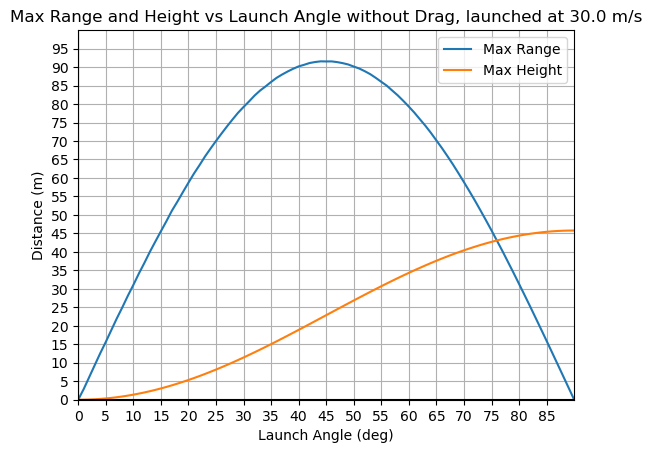

In [4]:
def soccer_ball_trajectory_no_drag(
        x0 = 0,
        y0 = 0,
        v0 = 30,
        launch_angle = 30,
        ball_and_environment_properties= ball_and_environment_properties,
        nstep = 10000):
    # Soccer ball and environment constants
    g = ball_and_environment_properties['g']

    # Initial Conditions
    nstep = nstep
    t = np.linspace(0., 60., nstep)
    dt = t[1]-t[0]
    v = velocity(v0,launch_angle)
    a = acceleration(g)
    x = x0
    y = y0
    x_graph = np.zeros_like(t)
    y_graph = np.zeros_like(t)
    x_graph[0] = x
    y_graph[0] = y
    i = 0
    while y_graph[i] >= 0:    
        v = [v[0], v[1]+a[1]*dt]
        x = x + v[0]*dt
        y = y + v[1]*dt
        x_graph[i+1] = x
        y_graph[i+1] = y
        i+=1

    x_graph = x_graph[:i]
    y_graph = y_graph[:i]
    return x_graph,y_graph


# find max range and height for launch angles between 0 and 90 degrees no drag
def max_range_and_height_no_drag(launch_angle:float):
    x_graph,y_graph = soccer_ball_trajectory_no_drag(x0,y0,v0, launch_angle, ball_and_environment_properties)
    max_range = max(np.sqrt(x_graph**2))
    max_height = max(y_graph)
    return max_range,max_height

# find max range and height for launch angles between 0 and 90 degrees
launch_angles = np.linspace(0,90,91)
max_ranges_no_drag = []
max_heights_no_drag = []
for launch_angle in launch_angles:
    max_range_no_drag,max_height_no_drag = max_range_and_height_no_drag(launch_angle)
    max_ranges_no_drag.append(max_range_no_drag)
    max_heights_no_drag.append(max_height_no_drag)

# plot max range and height vs launch angle
plt.plot(launch_angles,max_ranges_no_drag, label = 'Max Range')
plt.plot(launch_angles,max_heights_no_drag, label = 'Max Height')
plt.xlabel('Launch Angle (deg)')
plt.ylabel('Distance (m)')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.xticks(np.arange(0, max(launch_angles), step=5))
plt.yticks(np.arange(0, int(np.ceil((max(max_ranges_no_drag)/5))*5)+5, step=5))
plt.xlim(0, np.ceil(max(launch_angles)/5)*5)
plt.ylim(0, int(np.ceil((max(max_ranges_no_drag)/5))*5)+5)
plt.title(f'Max Range and Height vs Launch Angle without Drag, launched at {v0} m/s')
plt.legend()
plt.grid()
plt.show()



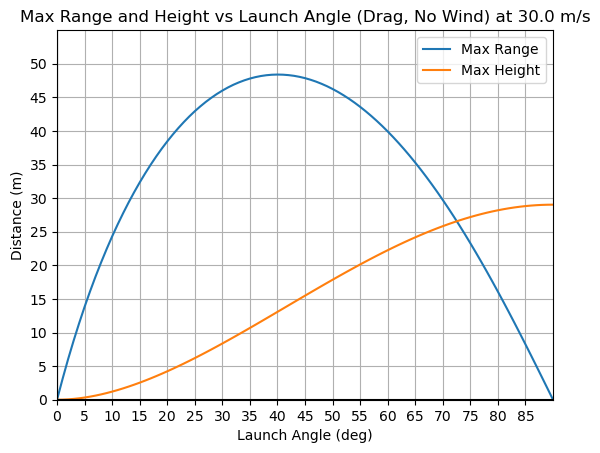

In [5]:
# function to find max range and height of soccer ball's trajectory given launch angle
def max_range_and_height_with_drag(launch_angle:float):
    x_graph,y_graph = soccer_ball_trajectory(x0,y0,v0, launch_angle, ball_and_environment_properties,wind_velocity = 0,wind_angle = 0)
    max_range = max(np.sqrt(x_graph**2))
    max_height = max(y_graph)
    return max_range,max_height

# find max range and height for launch angles between 0 and 90 degrees
launch_angles = np.linspace(0,90,91)

max_ranges = []
max_heights = []
for launch_angle in launch_angles:
    max_range,max_height = max_range_and_height_with_drag(launch_angle)
    max_ranges.append(max_range)
    max_heights.append(max_height)

# plot max range and height vs launch angle
plt.plot(launch_angles,max_ranges, label = 'Max Range')
plt.plot(launch_angles,max_heights, label = 'Max Height')
plt.xlabel('Launch Angle (deg)')
plt.ylabel('Distance (m)')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.xticks(np.arange(0, max(launch_angles), step=5))
plt.yticks(np.arange(0, int(np.ceil((max(max_ranges)/5))*5)+5, step=5))
plt.xlim(0, max(launch_angles))
plt.ylim(0, int(np.ceil((max(max_ranges)/5))*5)+5)
plt.grid()
plt.title(f'Max Range and Height vs Launch Angle (Drag, No Wind) at {v0} m/s')
plt.legend()
plt.show()

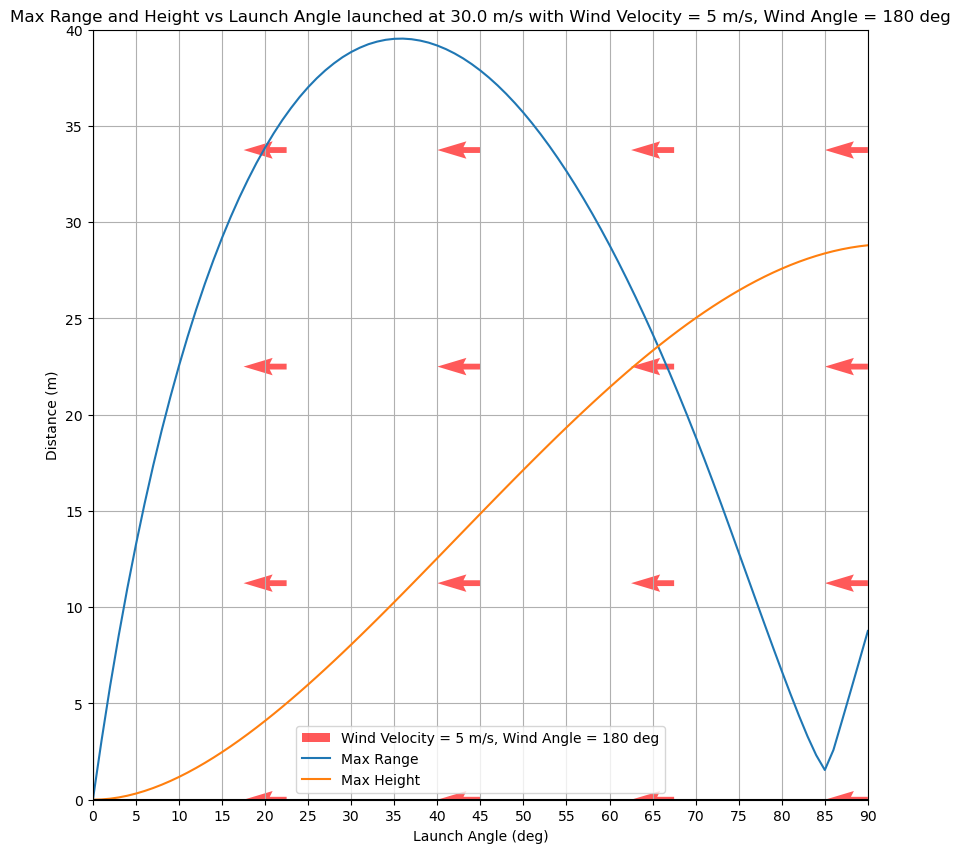

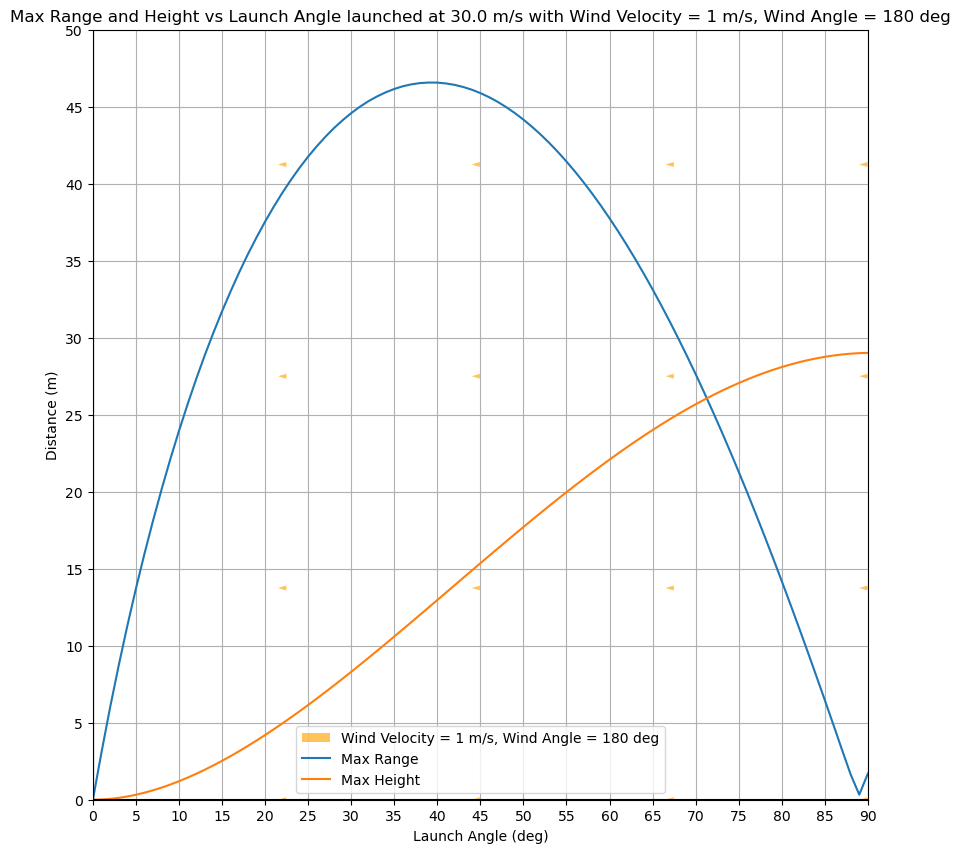

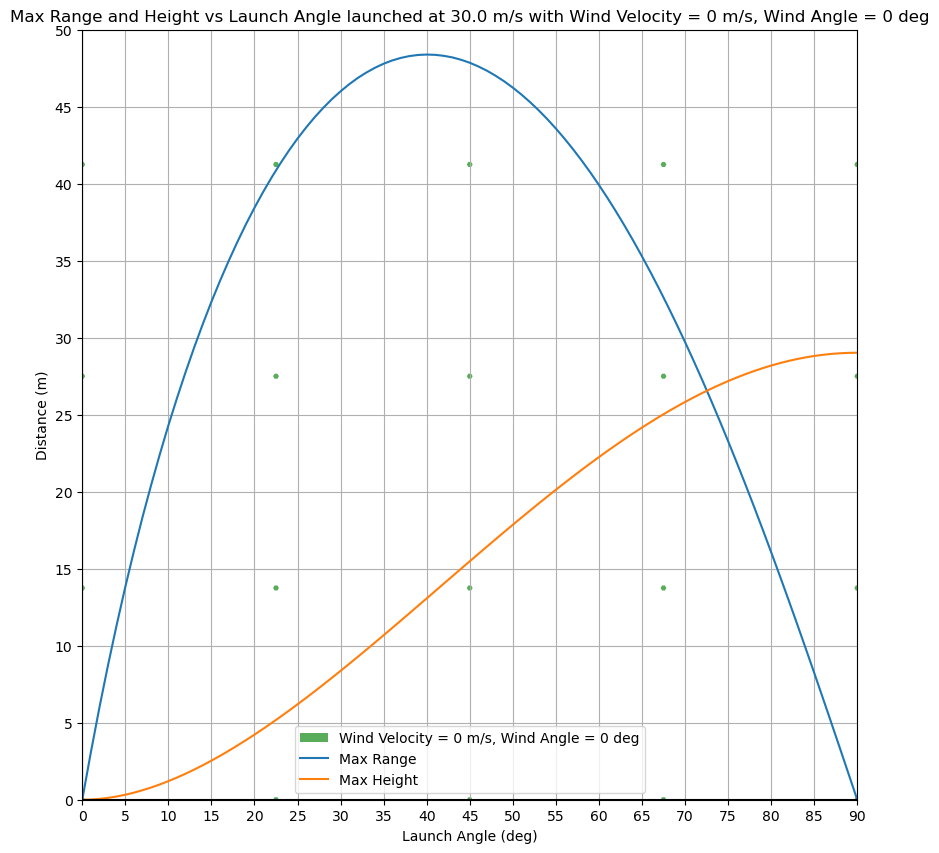

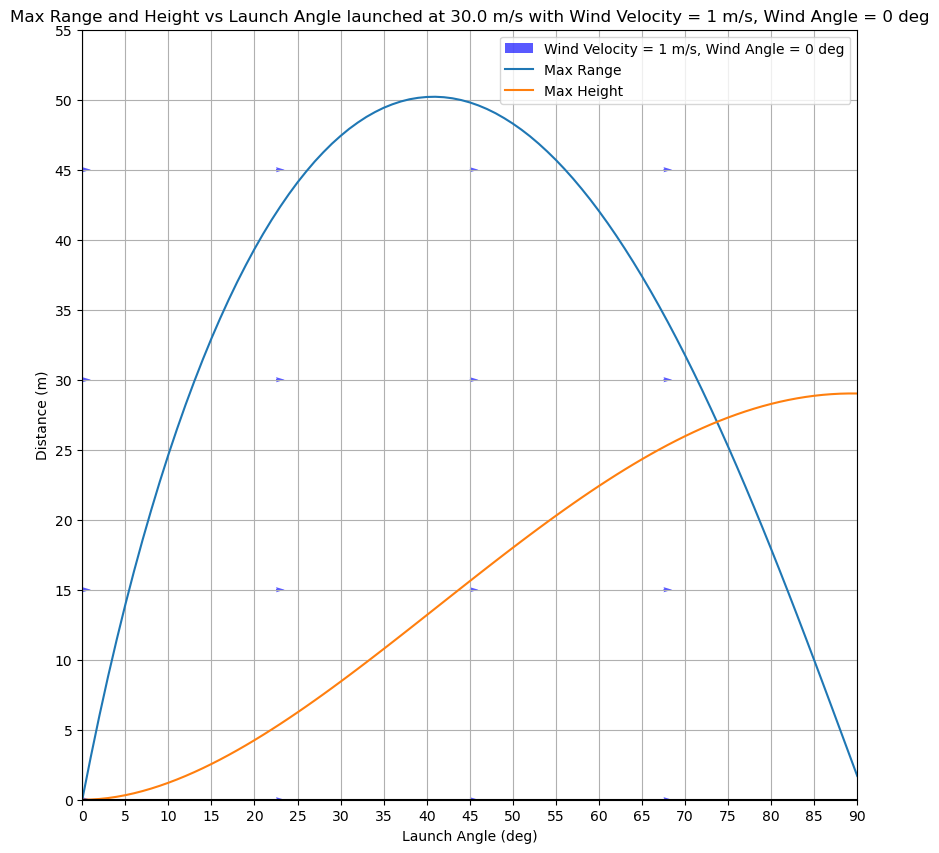

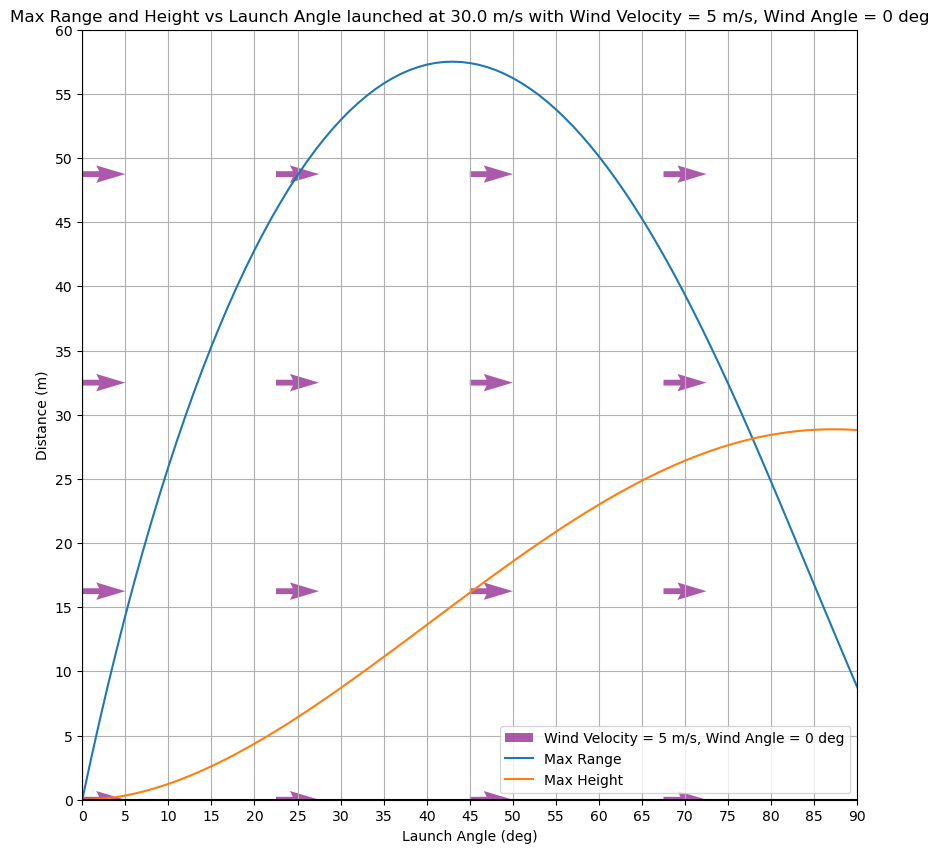

In [6]:

# find max range and height for launch angles between 0 and 90 degrees with wind
def max_range_and_height_with_wind(launch_angle:float,wind_velocity:float,wind_angle:float):
    x_graph,y_graph = soccer_ball_trajectory(x0,y0,v0, launch_angle, ball_and_environment_properties,wind_velocity,wind_angle)
    max_range = max(np.sqrt(x_graph**2))# magnitude of farthest distance from origin (in positive or negative direction)
    max_height = max(y_graph)
    return max_range,max_height

# find max range and height for launch angles between 0 and 90 degrees
wind_velocities = [5,1,0,1,5] # you can change this to any value
wind_angles = [180,180,0,0,0]
wind_colors = ['red','orange','green','blue','purple']
for wind_velocity,wind_angle,wind_color in zip(wind_velocities,wind_angles,wind_colors):
    w = wind(wind_velocity,wind_angle)
    plt.figure(figsize=(10,10))
    launch_angles = np.linspace(0,90,91)
    max_ranges_with_wind = []
    max_heights_with_wind = []
    for launch_angle in launch_angles:
        max_range_with_wind,max_height_with_wind = max_range_and_height_with_wind(launch_angle,wind_velocity,wind_angle)
        max_ranges_with_wind.append(max_range_with_wind)
        max_heights_with_wind.append(max_height_with_wind)
    
    # create grid
    X = np.linspace(min(0,x_floor), max(launch_angles), 5)
    Y = np.linspace(min(0,y_floor), int(np.ceil((max(max_ranges_with_wind)/5))*5)+5, 5)
    Y, X = np.meshgrid(Y, X)
    U = np.ones_like(X)*w[0]
    V = np.ones_like(Y)*w[1]


    # plot wind vector field
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
            alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')

    # plot max range and height vs launch angle
    plt.plot(launch_angles,max_ranges_with_wind, label = 'Max Range')
    plt.plot(launch_angles,max_heights_with_wind, label = 'Max Height')
    plt.xlabel('Launch Angle (deg)')
    plt.ylabel('Distance (m)')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.xticks(np.arange(0, max(launch_angles)+5, step=5))
    plt.yticks(np.arange(0, int(np.ceil((max(max_ranges_with_wind)/5))*5)+5, step=5))
    plt.xlim(0, np.ceil(max(launch_angles)/5)*5)
    plt.ylim(0, int(np.ceil((max(max_ranges_with_wind)/5))*5))
    plt.title(f'Max Range and Height vs Launch Angle launched at {v0} m/s with Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
    plt.legend()
    plt.grid()
    plt.show()



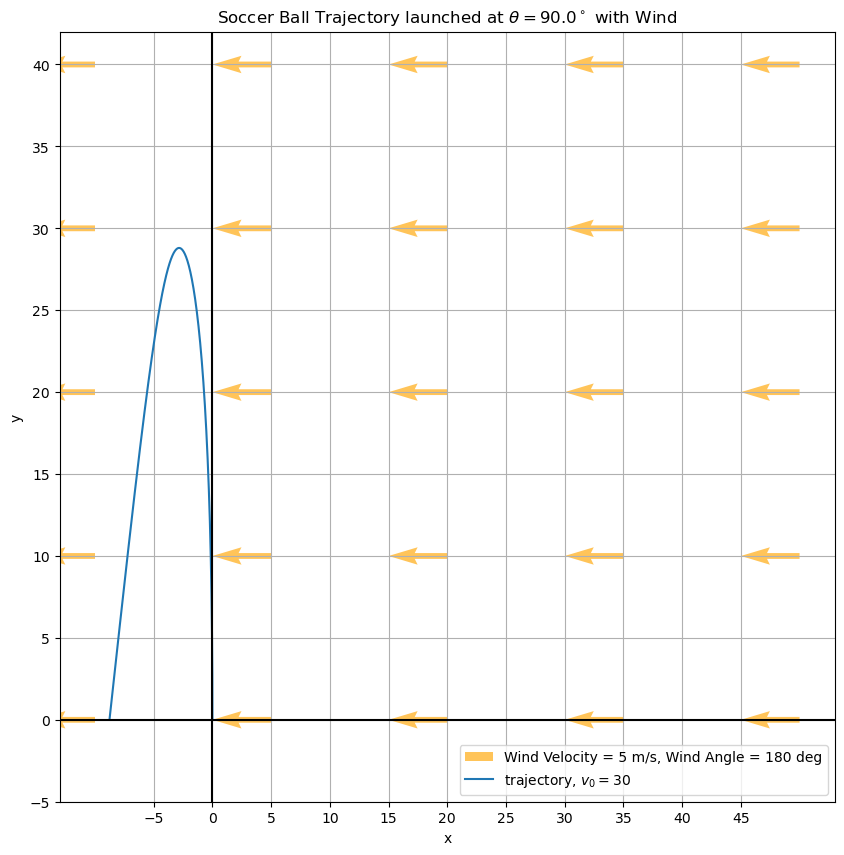

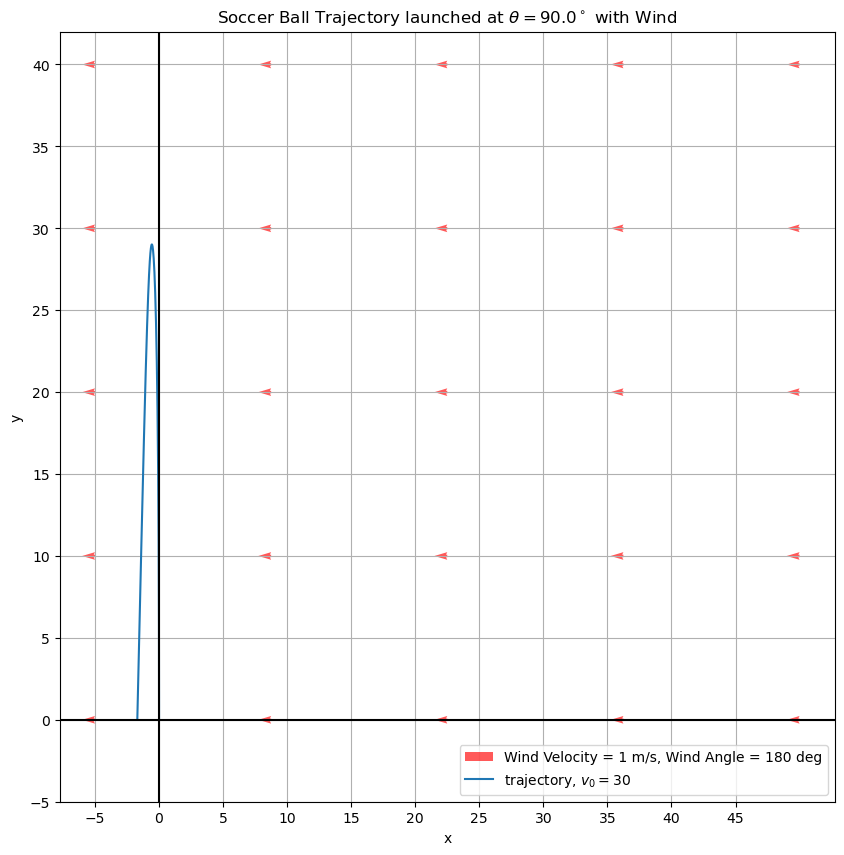

In [7]:
wind_speeds = [1,5]
wind_angles = [180,180]
wind_colors = ['orange','red']

for wind_velocity,wind_color,wind_angle in zip(wind_velocities, wind_colors,wind_angles):
    w = wind(wind_velocity,wind_angle)
    plt.figure(figsize=(10,10))
    x_graph,y_graph = soccer_ball_trajectory(x0,y0,v0, launch_angle, ball_and_environment_properties,wind_velocity,wind_angle)

    x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
    y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
    x_floor = int(np.floor(x_graph[-1]/5)*5)
    y_floor = int(np.floor(y_graph[-1]/5)*5)
    # create grid
    X = np.linspace(min(0,x_floor), max(50,x_ceiling), 5)
    Y = np.linspace(min(0,y_floor), max(40,y_ceiling), 5)
    Y, X = np.meshgrid(Y, X)
    U = np.ones_like(X)*w[0]
    V = np.ones_like(Y)*w[1]


    # plot wind vector field
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
            alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')

    # plot trajectory
    plt.plot(x_graph, y_graph, label = 'trajectory, $v_0 = 30\frac{{m}}{{s}}$')
    plt.xticks(np.arange(-5, max(50,x_ceiling), step=5))
    plt.yticks(np.arange(-5, max(40,40+y_ceiling), step=5))
    plt.title(f'Soccer Ball Trajectory launched at $\\theta = ${launch_angle}$^\circ$ with Wind')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()




Compare the results with the analytical solution for the range and maximum height of the ball without drag force and wind vs with drag force, and with drag and wind.

The analytical solution for the range without drag is given by:

$$ 
\begin{equation}
R = \frac{v_0^2}{g} \sin(2\theta)
\end{equation}
$$

and for the maximum height is given by:

$$
\begin{equation}
H = \frac{v_0^2}{2g} \sin^2(\theta)
\end{equation}
$$

where $v_0$ is the initial velocity, $\theta$ is the launching angle, and $g$ is the gravitational acceleration.

Finding the range of a soccer ball drag force is more difficult. To find the range, you need to solve the following differential equation:

$$
\begin{equation}
\frac{dv_x}{dt} = - \frac{1}{2} \frac{C_d \rho A}{m} v_x^2
\end{equation}

$$

where $v_x$ is the velocity of the ball in the x-direction, $C_d$ is the drag coefficient, $\rho$ is the density of the air, $A$ is the cross-sectional area of the ball, and $m$ is the mass of the ball. The initial condition is $v_x = v_0 \cos(\theta)$ at $t = 0$. The solution to this differential equation is given by:

$$ 
\begin{equation}
v_x = \frac{v_0 \cos(\theta)}{1 + \frac{1}{2} \frac{C_d \rho A}{m} v_0 \cos(\theta) t}
\end{equation}
$$


### Problem 3

Consider two soccer players, Diego and Mia. Mia has a stellar record of scoring goal with
her head. She is 1.70 m tall and on average she jumps 30 cm. Diego has a stellar record in
passing or crossing the ball to the scorer. Diego is in midfield while Mia is in the penalty
area. They are at a relative distance of x meters. Chose a few values of relative distances and calculate the
angle Diego has to give to the initial velocity of the ball in order to land the ball on Mia’s
head in its descendant part of the (almost) parabolic trajectory. Increase the initial velocity
if you need to, do not exceed the maximum velocity of 58.6 m/s.

ball’s diameter and weight, d = .22 meters and mass = 0.420 kg, and for the density
of the air use ρ = 1.3 kg/m3

In [8]:
g = 9.81  # m/s^2 (acceleration due to gravity)
#x = 1 plus or minus 1
pm = np.array([+1, -1])

pm = np.array([+1, -1])
theta1,theta2 = np.rad2deg(np.arctan((60+ pm*np.sqrt(3600-(4*g*(4+g)))) / (2*g)))
theta1,theta2


(80.34278266477087, 13.471292169519488)

In [9]:
# calculate angles for diego to mia
theta1,theta2 = np.rad2deg(np.arctan((60+pm*np.sqrt(3600-(4*g*(4+g)))) / (2*g)))
print(f'theta1 = {theta1}, theta2 = {theta2}')

# plot diego to mia
x_graph1, y_graph1= soccer_ball_trajectory_no_drag(0,0,30,theta1,ball_and_environment_properties,nstep = 100000000)
x_graph2, y_graph2= soccer_ball_trajectory_no_drag(0,0,30,theta2,ball_and_environment_properties,nstep = 100000000)
plt.plot(x_graph1,y_graph1, label = f'Diego to Mia, $\\theta_1$ = {theta1:.2f}')
plt.plot(x_graph2,y_graph2, label = f'Diego to Mia, $\\theta_2$ = {theta2:.2f}')
plt.scatter(30,2, label = 'Mia', marker='o', color='red')
plt.scatter(0,0, label = 'Diego', marker='o', color='blue')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Diego to Mia')
plt.xticks(np.arange(0, 50, step=5))
plt.yticks(np.arange(0, 50, step=5))
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.show()




theta1 = 80.34278266477087, theta2 = 13.471292169519488


theta1 = 77.56911345363298, theta2 = 2.8942507879076147


/Users/andrewhoyt/miniconda3/envs/physics/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/andrewhoyt/miniconda3/envs/physics/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


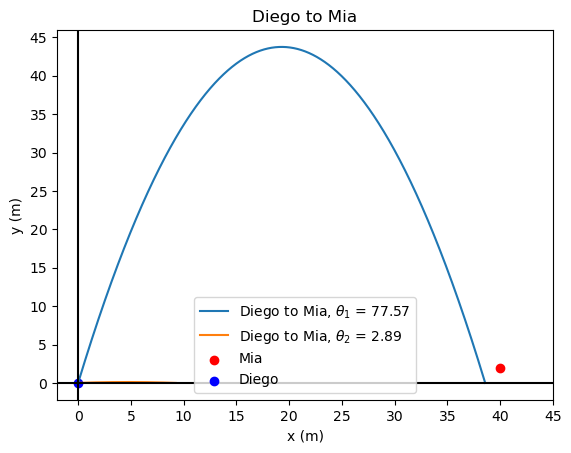

In [ ]:
theta1 = np.arctan((360+np.sqrt(129600-(4*(g*8)*(18)))) / (2*g*8))
theta2 = np.arctan((360-np.sqrt(129600-(4*(g*8)*(18)))) / (2*g*8))
theta1,theta2 = np.rad2deg(theta1),np.rad2deg(theta2)
print(f'theta1 = {theta1}, theta2 = {theta2}')
x_graph1, y_graph1= soccer_ball_trajectory_no_drag(0,0,30,theta1,ball_and_environment_properties,nstep = 100000000)
x_graph2, y_graph2= soccer_ball_trajectory_no_drag(0,0,30,theta2,ball_and_environment_properties,nstep = 100000000)
plt.plot(x_graph1,y_graph1, label = f'Diego to Mia, $\\theta_1$ = {theta1:.2f}')
plt.plot(x_graph2,y_graph2, label = f'Diego to Mia, $\\theta_2$ = {theta2:.2f}')
plt.scatter(40,2, label = 'Mia', marker='o', color='red')
plt.scatter(0,0, label = 'Diego', marker='o', color='blue')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Diego to Mia')
plt.xticks(np.arange(0, 50, step=5))
plt.yticks(np.arange(0, 50, step=5))
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

In [ ]:
# show closest part of trajectory to Mia
mia_x = 30
mia_y = 2

print(f'mias head is at {mia_x,mia_y} and the closest part of the trajectory is at {x_graph[np.argmin(np.abs(x_graph-mia_x))],y_graph[np.argmin(np.abs(x_graph-mia_x))]}')

mias head is at (30, 2) and the closest part of the trajectory is at (0.0, 0.0)


In [ ]:
def find_launch_angle(x,v0,y = 2):
    """x = relative distance, v0 = initial velocity, y  = height of Mia's head"""
    pm = np.array([+1, -1])
    a = (g*x**2)/(2*v0**2)
    b = -x
    c = (y+(((x**2)*g)/(2*v0**2)))
    solutions = np.rad2deg(np.arctan((-b + (pm * np.sqrt((b**2)-(4*a*c))))/(2*a)))
    # if no soultions:
    if b**2-4*a*c < 0:
        return 'no solutions, try a higher velocity'
    # if one solution:
    elif b**2-4*a*c == 0:
        solution = solutions[~np.isnan(solutions)] # get the non-nan value
        t = x/(v0*np.cos(np.deg2rad(solution))) # time it takes to get to Mia
        vy = v0*np.sin(np.deg2rad(solution)) - g*t # y velocity at time it takes to get to Mia
        if vy>=0: # if y velocity is greater than 0, then the ball reached Mia, but not while it was falling downward
            return 'ball reach Mia,but not while it was falling downward'
        else:
            return solution
    # if two solutions:
    
    # find solutions where ball is v_y of ball is less than 0
    for solution in solutions:
        t = x/(v0*np.cos(np.deg2rad(solution)))
        vy = v0*np.sin(np.deg2rad(solution)) - g*t
        if vy>=0:
            solutions = solutions[solutions!=solution]
    if len(solutions) == 0:
        return 'ball reached Mia, but not while it was falling downward'
    return solutions

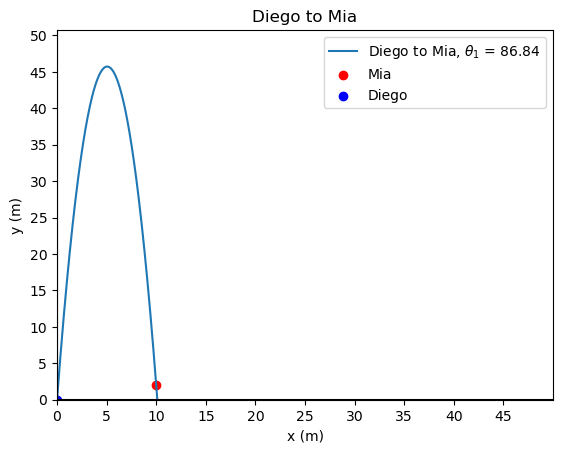

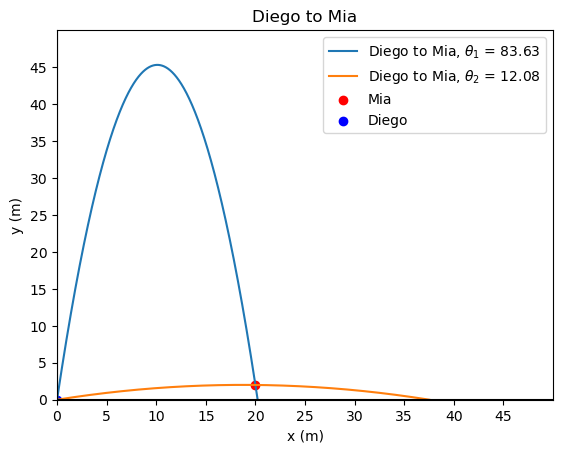

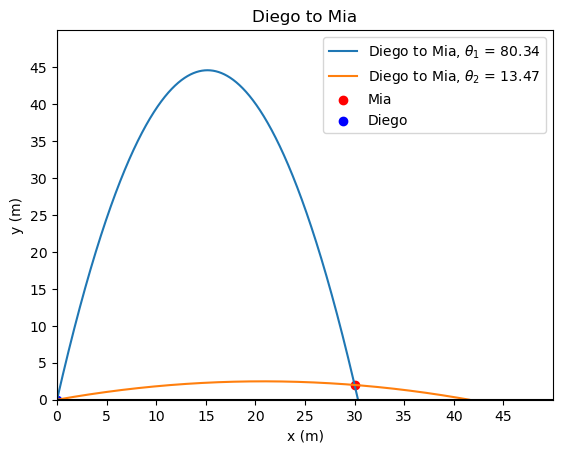

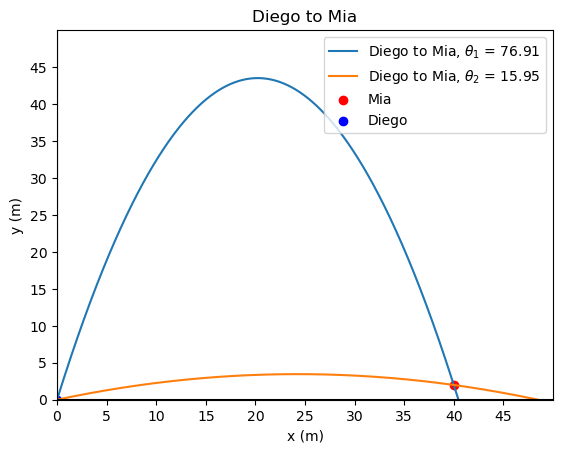

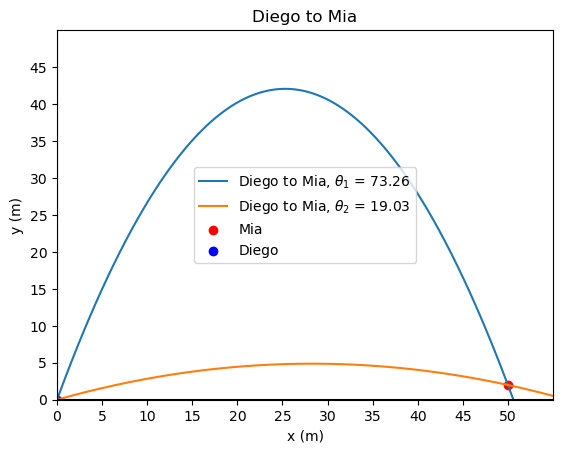

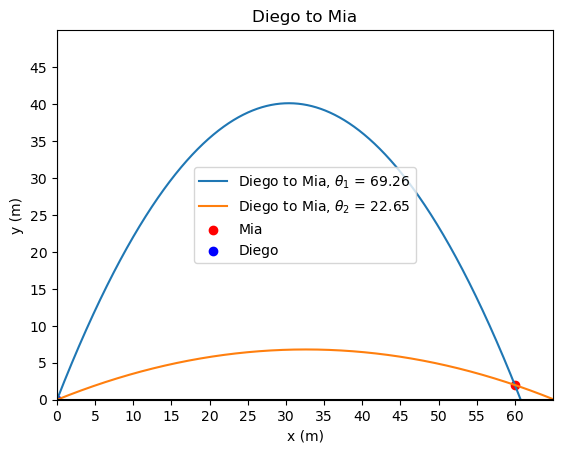

no solutions, try a higher velocity. There are no solutions for distance = 100


/var/folders/y8/3577zp2906160w47dbt5wlwm0000gn/T/ipykernel_1683/2957136395.py:7: RuntimeWarning: invalid value encountered in sqrt
  solutions = np.rad2deg(np.arctan((-b + (pm * np.sqrt((b**2)-(4*a*c))))/(2*a)))


In [ ]:
distances = [10,20,30,40,50,60,100]
for distance in distances:
    thetas = find_launch_angle(distance,30)
    #if theta is a string, then print there are no solutions
    if isinstance(thetas,str):
        print(thetas+f'. There are no solutions for distance = {distance}')
        continue
    count=0
    for theta in thetas:
        count+=1
        #x_graph, y_graph= soccer_ball_trajectory(0,0,30,theta,ball_and_environment_properties)
        x_graph, y_graph= soccer_ball_trajectory_no_drag(0,0,30,theta,ball_and_environment_properties,nstep = 100000)
        plt.plot(x_graph,y_graph, label = f'Diego to Mia, $\\theta_{count}$ = {theta:.2f}')
    plt.scatter(distance,2, label = 'Mia', marker='o', color='red')
    plt.scatter(0,0, label = 'Diego', marker='o', color='blue')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Diego to Mia')
    plt.xlim(0, max(50,distance+5))
    plt.ylim(0,max(50,max(y_graph)+5))
    plt.xticks(np.arange(0, max(50,distance+5), step=5))
    plt.yticks(np.arange(0,max(50,max(y_graph)+5) , step=5))
    plt.legend()
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.show()


## Problem 4

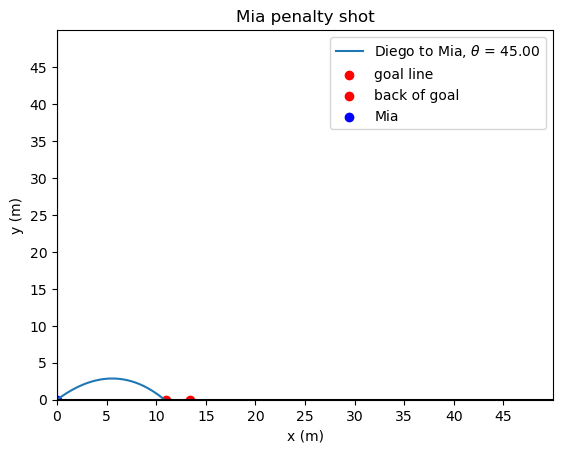

In [ ]:
v0 = 11 # m/s
launch_angle = 45 # deg
wind_velocity = 0 # m/s
wind_angle = 0 # deg


x_graph,y_graph = soccer_ball_trajectory(0,0,v0,launch_angle,ball_and_environment_properties)


plt.plot(x_graph,y_graph, label = f'Diego to Mia, $\\theta$ = {launch_angle:.2f}')
plt.scatter(11,0,label = 'goal line', marker='o', color='red')
plt.scatter(13.44,0,label = 'back of goal', marker='o', color='red')
plt.scatter(0,0, label = 'Mia', marker='o', color='blue')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Mia penalty shot')
plt.xlim(0, max(50,13.44+5))
plt.ylim(0,max(50,max(y_graph)+5))
plt.xticks(np.arange(0, max(50,13.44+5), step=5))
plt.yticks(np.arange(0,max(50,max(y_graph)+5) , step=5))
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


 
# Soccer ball and environment constants
diameter = 0.22             # meters
mass = 0.42                 # kg
density_air = 1.3           # kg/m^3
Cd = 0.25                    # Drag coefficient (you can adjust this value)
A = np.pi*(diameter/2.)**2.   # Cross-sectional area of soccer ball
g = 9.81  # m/s^2 (acceleration due to gravity)

# Initial Conditions
v0 = 30.
alpha = 0.5*Cd*A*density_air
wind_velocity = 1.
wind_angle = 0.
wind_velocity_x = wind_velocity*np.cos(np.deg2rad(wind_angle))
wind_velocity_y = wind_velocity*np.sin(np.deg2rad(wind_angle))
w = [wind_velocity_x, wind_velocity_y]
launch_angle = 45.
x0 = 0.
y0 = 0.

# Simulation time step and time vector
nstep = 100000
t = np.linspace(0., 50., nstep)
dt = t[1]-t[0]

# Initialize vectors
x = x0
y = x0
x_graph = np.zeros_like(t)
y_graph = np.zeros_like(t)
x_graph[0] = x
y_graph[0] = y

v_x = v0 * np.cos(np.deg2rad(launch_angle))
v_y = v0 * np.sin(np.deg2rad(launch_angle))
v = [v_x, v_y]
v_magnitude = np.sqrt(v[0]**2+v[1]**2)

a = [0.,-g]

F = [a[0]*mass, a[1]*mass]
F_drag = [alpha*(v_magnitude**2)*-v[0], alpha*(v_magnitude**2)*-v[1]]
F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]

# Main loop
i = 0
while y_graph[i] >= 0:    
    rel_v= [v[0]-w[0], v[1]-w[1]]
    v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
    unit_v = rel_v/v_magnitude
    F_drag = (alpha*(v_magnitude**2))*-unit_v
    F = [a[0]*mass, a[1]*mass]
    F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
    v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
    x = x + v[0]*dt
    y = y + v[1]*dt
    x_graph[i+1] = x
    y_graph[i+1] = y
    i+=1

# put these values into a dict:
ball_and_environment_properties = {
    'diameter': 0.22,             # meters
    'mass': 0.42,                 # kg
    'density_air': 1.3,           # kg/m^3
    'Cd': 0.25,                   # Drag coefficient (you can adjust this value)
    'g': 9.81,                    # Acceleration due to gravity (m/s^2)
}
# functions for initializing the vectors
def wind(wind_velocity:float,wind_angle:float):
    wind_velocity_x = wind_velocity*np.cos(np.deg2rad(wind_angle))
    wind_velocity_y = wind_velocity*np.sin(np.deg2rad(wind_angle))
    w = np.array([wind_velocity_x, wind_velocity_y])
    return w

def velocity(v0:float,launch_angle:float):
    v_x = v0 * np.cos(np.deg2rad(launch_angle))
    v_y = v0 * np.sin(np.deg2rad(launch_angle))
    v = np.array([v_x, v_y])
    return v

def velocity_magnitude(v:np.ndarray):
    v_magnitude = np.sqrt(v[0]**2+v[1]**2)
    return v_magnitude

def velocity_unit_vector(v:np.ndarray,v_magnitude:float):
    unit_v = v/v_magnitude
    return unit_v

def acceleration(g: float):
    a = np.array([0,-g])
    return a

def force(a:np.ndarray,mass:float):
    F = np.array([a[0]*mass, a[1]*mass])
    return F

def net_force(F:np.ndarray,F_drag:np.ndarray):
    F_net = np.array([F[0]+F_drag[0], F[1]+F_drag[1]])
    return F_net

def drag_force(alpha:float,v_magnitude:float,unit_v:np.ndarray):
    F_drag = alpha*(v_magnitude**2)*-1*unit_v
    return F_drag

# create the loop above into a function
def soccer_ball_trajectory_new(
        x0 = 0,
        y0 = 0,
        target_x = 30,
        target_y = 2,
        v0 = 30,
        launch_angle = 30,
        ball_and_environment_properties= ball_and_environment_properties,
        wind_velocity = 0,
        wind_angle = 0,
        tolerance = 0.1):
    # Soccer ball and environment constants
    diameter = ball_and_environment_properties['diameter']
    mass = ball_and_environment_properties['mass']
    density_air = ball_and_environment_properties['density_air']
    Cd = ball_and_environment_properties['Cd']
    g = ball_and_environment_properties['g']
    A = np.pi*(diameter/2)**2   # Cross-sectional area of soccer ball

    # Initial Conditions
    nstep = 100000
    t = np.linspace(0., 60., nstep)
    alpha = 0.5*Cd*A*density_air
    w = wind(wind_velocity,wind_angle)
    v = velocity(v0,launch_angle)
    v_magnitude = velocity_magnitude(v)
    unit_v = velocity_unit_vector(v,v_magnitude)
    a = acceleration(g)
    F = force(a,mass)
    F_drag = drag_force(alpha,v_magnitude,unit_v)
    F_net = net_force(F,F_drag)
    x = x0
    y = y0
    x_graph = np.zeros_like(t)
    y_graph = np.zeros_like(t)
    x_graph[0] = x
    y_graph[0] = y
    i = 0
    while y_graph[i] >= 0 and x_graph[i] <= target_x:    
        rel_v = [v[0]-w[0], v[1]-w[1]]
        v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
        unit_v = rel_v/v_magnitude
        F_drag = alpha*(v_magnitude**2)*-unit_v
        F = [a[0]*mass, a[1]*mass]
        F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
        v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
        x = x + v[0]*dt
        y = y + v[1]*dt
        if x >= target_x and y>=target_y:
            print(f'stop because passed x, x = {x}, x-1 = {x_graph[i-1]} and y above target, y = {y}, target_y = {target_y}')
            x_graph[i+1] = x
            y_graph[i+1] = y
            i+=1
            break
        # if y == target_y:
        #     y_graph[i+1] = y
        #     break
        #changed below from y<=target_y to y>=target_y
        if y>=y_graph[i-1] and x >= target_x: 
            print(f'stop because passed y not falling downward, y = {y}, y-1 = {y_graph[i-1]}')
            # y_graph[i+1] = y
            x_graph[i+1] = x
            y_graph[i+1] = y
            i+=1
            break
        x_graph[i+1] = x
        y_graph[i+1] = y
        i+=1
    x_graph = x_graph[:i+1]
    y_graph = y_graph[:i+1]
    print(f'x_graph = {x_graph[-1]}, y_graph = {y_graph[-1]}')
    if len(x_graph) == 0:
        msg = str(f"len x_graph == 0, angle = {launch_angle}")
        print(msg)
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance
    elif abs(x_graph[-1]-target_x) > tolerance:
        print(abs(x_graph[-1]-target_x))
        print(x_graph[-1],target_x,tolerance)
        msg = str(f"abs(x_graph[-1]-target_x) > tolerance , angle = {launch_angle}")
        print(msg)
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 
    elif abs(y_graph[-1]-target_y) > tolerance:
        print(abs(y_graph[-1]-target_y))
        print(y_graph[-1],target_y,tolerance)
        msg = str(f"abs(y_graph[-1]-target_y) > tolerance , angle = {launch_angle}")
        print(msg)
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 
    elif any(np.isnan(x_graph)) or np.any(np.isnan(y_graph)):
        msg = str('nan graphs')
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 
    print(f'success yay , angle = {launch_angle}')
    return x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 

soccer_ball_trajectory_new(0,0,30,2,30,17.32,ball_and_environment_properties,wind_velocity = 0,wind_angle = 0,tolerance = 0.1)

x_graph = 30.00093511655575, y_graph = 1.904882927693234
success yay , angle = 17.32


(array([0.00000000e+00, 1.43168381e-02, 2.86305185e-02, ...,
        2.99826411e+01, 2.99917887e+01, 3.00009351e+01]),
 array([0.        , 0.00446223, 0.00892102, ..., 1.90981892, 1.90735198,
        1.90488293]),
 0,
 0,
 30,
 2,
 30,
 17.32,
 {'diameter': 0.22, 'mass': 0.42, 'density_air': 1.3, 'Cd': 0.25, 'g': 9.81},
 0,
 0,
 0.1)

In [ ]:
def find_launch_angle_with_drag(x, v0, y=2, k=0.0, m=0.420):
    """x = relative distance, v0 = initial velocity, y = height of Mia's head, k = drag coefficient, m = mass of the ball"""
    g = 9.81  # Acceleration due to gravity (m/s^2)
    pm = np.array([+1, -1])

    # Calculate parameters related to air resistance
    drag_term = (k / m) * (v0 ** 2)
    
    a = (g * x ** 2) / (2 * v0 ** 2)
    b = -x
    c = (y + ((x ** 2) * g / (2 * v0 ** 2))) - drag_term

    solutions = np.rad2deg(np.arctan((-b + (pm * np.sqrt((b ** 2) - (4 * a * c))) / (2 * a))))

    # if no solutions:
    if b ** 2 - 4 * a * c < 0:
        return 'no solutions, try a higher velocity'
    # if one solution:
    elif b ** 2 - 4 * a * c == 0:
        solution = solutions[~np.isnan(solutions)]  # Get the non-nan value
        t = x / (v0 * np.cos(np.deg2rad(solution)) * (1 - (drag_term * t ** 2 / 2)))  # Account for drag in time calculation
        vy = v0 * np.sin(np.deg2rad(solution)) - g * t - (drag_term * t)  # Account for drag in y-velocity calculation
        if vy >= 0:  # if y velocity is greater than 0, then the ball reached Mia, but not while it was falling downward
            return 'ball reach Mia, but not while it was falling downward'
        else:
            return solution
    # if two solutions:

    # find solutions where the ball's y velocity is less than 0
    for solution in solutions:
        t = x / (v0 * np.cos(np.deg2rad(solution)) * (1 - (drag_term * t ** 2 / 2)))  # Account for drag in time calculation
        vy = v0 * np.sin(np.deg2rad(solution)) - g * t - (drag_term * t)  # Account for drag in y-velocity calculation
        if vy >= 0:
            solutions = solutions[solutions != solution]
    if len(solutions) == 0:
        return 'ball reached Mia, but not while it was falling downward'
    return solutions


find_launch_angle_with_drag(30,30, k=0.25, m=0.420)

UnboundLocalError: cannot access local variable 't' where it is not associated with a value

In [ ]:
def new_find_launch_angle(x0 = 0, 
                          y0 = 0, 
                          target_x = 30,
                          target_y = 2, 
                          v0=30, 
                          ball_and_environment_properties= ball_and_environment_properties, 
                          wind_velocity=0, 
                          wind_angle=0, 
                          tolerance = 0.1):
    
    # Iterate over a range of launch angles (e.g., from 10 to 80 degrees)
    valid_angles = []
    x_graphs = []
    y_graphs = []
    angles = np.linspace(0,90,int(91/tolerance))
    for angle in angles:
        results = soccer_ball_trajectory_new(x0 = x0, y0 = y0,target_x=target_x,target_y=target_y, v0=v0, launch_angle=angle, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=wind_velocity, wind_angle=wind_angle, tolerance = tolerance)
        #if results[0] is a string
        if isinstance(results[0],str):
            print(results[0])
            continue
        else:
            x_graph, y_graph, launch_angle = results[0], results[1], results [7]
            if y_graph[-1]>y_graph[-2]:
                print(f"The ball launched at {v0} m/s at {angle}º will reach Mia's head, but not on it's descent")
                continue
            # elif y_graph[-1]<y_graph[-2]:
            valid_angles.append(launch_angle) 
            x_graphs.append(x_graph)
            y_graphs.append(y_graph)
                #print valid angles, x_graphs, y_graphs
            print(f'valid angles = {valid_angles},x_graphs = {x_graphs},y_graphs = {y_graphs}')
            
            print(f"The ball launched at {v0} m/s at {angle}º will reach Mia's head descending at {launch_angle}º")
    ## remove any angles in valid angles that are within tolerance of the angle before it
    if len(valid_angles)>1:
        # Initialize the list of unique angles with the first angle 
        unique_angles = [valid_angles[0]]

        # Iterate over the rest of the angles
        for angle in valid_angles[1:]:
            # If the current angle is not within the tolerance of the previous angle, add it to the list
            if abs(angle - unique_angles[-1]) > tolerance:
                unique_angles.append(angle)

        # Replace the list of valid angles with the list of unique angles
        valid_angles = unique_angles
    
    
    # for i in range(0,len(valid_angles)-2):
    #     if abs(valid_angles[i]-valid_angles[i+1]) >tolerance:
    #         valid_angles.pop(i+1)
    #         x_graphs.pop(i+1)
    #         y_graphs.pop(i+1)
    #     if abs(valid_angles[i]-valid_angles[i-1]) >tolerance:
    #         valid_angles.pop(i)
    #         x_graphs.pop(i)
    #         y_graphs.pop(i)                    
    return valid_angles, x_graphs, y_graphs 

    #             w = wind(wind_velocity,wind_angle)
    #             x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
    #             y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
    #             x_floor = int(np.floor(x_graph[-1]/5)*5)
    #             y_floor = int(np.floor(y_graph[-1]/5)*5)
    #             # create grid
    #             X = np.linspace(min(0,x_floor), max(120,x_ceiling), 5)
    #             Y = np.linspace(min(0,y_floor), max(120,y_ceiling), 5)
    #             Y, X = np.meshgrid(Y, X)
    #             U = np.ones_like(X)*w[0]
    #             V = np.ones_like(Y)*w[1]
    #             # plot wind vector field
    #             if wind_velocity == 0:
    #                 wind_color = 'black'
    #             elif wind_velocity > 0:
    #                 wind_color = 'blue'
    #             else:
    #                 wind_color = 'red'

    #             plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
    #             alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
    #             plt.plot(x_graph, y_graph, label=f'Launch angle = {launch_angle:.2f} deg')
    
    
    # plt.scatter(target_x, target_y, label='Mia', marker='o', color='red')
    # plt.scatter(0, 0, label='Diego', marker='o', color='blue')
    # plt.xlabel('x (m)')
    # plt.ylabel('y (m)')
    # plt.title(f'Diego to Mia at initial velocity = {v0} m/s')
    # plt.xlim(0, 120)
    # plt.ylim(0, 120)
    # plt.xticks(np.arange(0, 120, step=5))
    # plt.yticks(np.arange(0, 120, step=5))
    # plt.legend()
    # plt.axhline(y=0, color='black', linestyle='-')
    # plt.axvline(x=0, color='black', linestyle='-')
    
 

def plot_new(x_graphs,y_graphs,valid_angles,target_x,target_y,wind_velocity,wind_angle,xlim = 120,ylim = 50,ticks = 5):
    plt.figure(figsize=(10,10))
    for x_graph,y_graph,launch_angle in zip(x_graphs,y_graphs,valid_angles):
        w = wind(wind_velocity,wind_angle)
        x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
        y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
        x_floor = int(np.floor(x_graph[-1]/5)*5)
        y_floor = int(np.floor(y_graph[-1]/5)*5)
        # create grid
        X = np.linspace(min(0,x_floor), max(xlim,x_ceiling), 5)
        Y = np.linspace(min(0,y_floor), max(ylim,y_ceiling), 5)
        Y, X = np.meshgrid(Y, X)
        U = np.ones_like(X)*w[0]
        V = np.ones_like(Y)*w[1]
        # plot wind vector field
        if wind_velocity == 0:
            wind_color = 'black'
        elif wind_velocity > 0:
            wind_color = 'blue'
        else:
            wind_color = 'red'
        # plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
        # alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
        plt.plot(x_graph, y_graph, label=f'Launch angle = {launch_angle:.2f} deg')

        plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
        alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
    plt.scatter(target_x, target_y, label='Mia', marker='o', color='red')
    plt.scatter(0, 0, label='Diego', marker='o', color='blue')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'Diego to Mia at initial velocity = {v0} m/s')
    plt.xlim(0,xlim+5)
    plt.ylim(0, ylim+5)
    plt.xticks(np.arange(0, xlim+5, step=ticks))
    plt.yticks(np.arange(0, ylim+5, step=ticks))
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.show()
    return




In [ ]:
angles,x,y = new_find_launch_angle(x0 = 0, y0 = 0 ,target_x = 30, target_y = 2, v0=30, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=1, wind_angle=0, tolerance = 0.1,)



x_graph = 0.01499705768449752, y_graph = -2.452549050735759e-06
29.985002942315504
0.01499705768449752 30 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
x_graph = 0.3142903810650008, y_graph = -2.2668770481083652e-05
29.685709618935
0.3142903810650008 30 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
x_graph = 0.6272263751631504, y_graph = -4.080614802507731e-05
29.37277362483685
0.6272263751631504 30 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
x_graph = 0.9388171969339115, y_graph = -5.685787847934041e-05
29.06118280306609
0.9388171969339115 30 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
x_graph = 1.2490719426147037, y_graph = -7.325434138887286

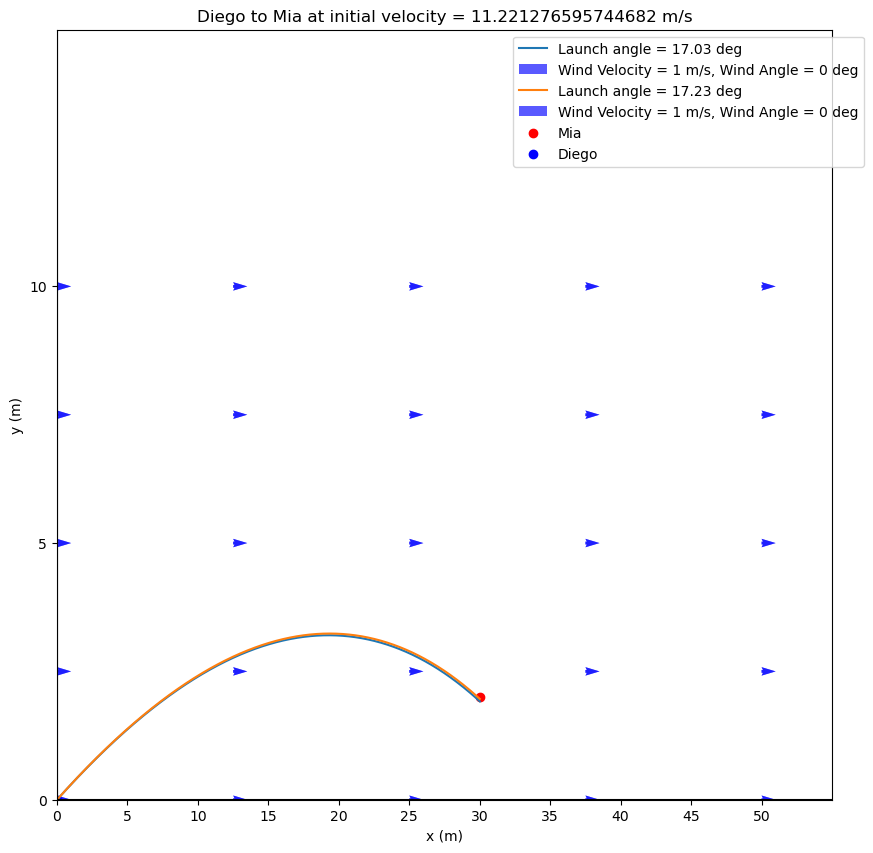

In [ ]:
plot_new(x,y,angles,30,2,1,0,xlim = 50,ylim = 10,ticks = 5)


In [ ]:
angles,x,y = new_find_launch_angle(x0 = 0, y0 = 0 ,target_x = 50, target_y = 2, v0=30, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=1, wind_angle=0, tolerance = 0.1,)

x_graph = 0.01499705768449752, y_graph = -2.452549050735759e-06
49.985002942315504
0.01499705768449752 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
x_graph = 0.3142903810650008, y_graph = -2.2668770481083652e-05
49.685709618935
0.3142903810650008 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
x_graph = 0.6272263751631504, y_graph = -4.080614802507731e-05
49.37277362483685
0.6272263751631504 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
x_graph = 0.9388171969339115, y_graph = -5.685787847934041e-05
49.06118280306609
0.9388171969339115 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
x_graph = 1.2490719426147037, y_graph = -7.325434138887286

IndexError: list index out of range

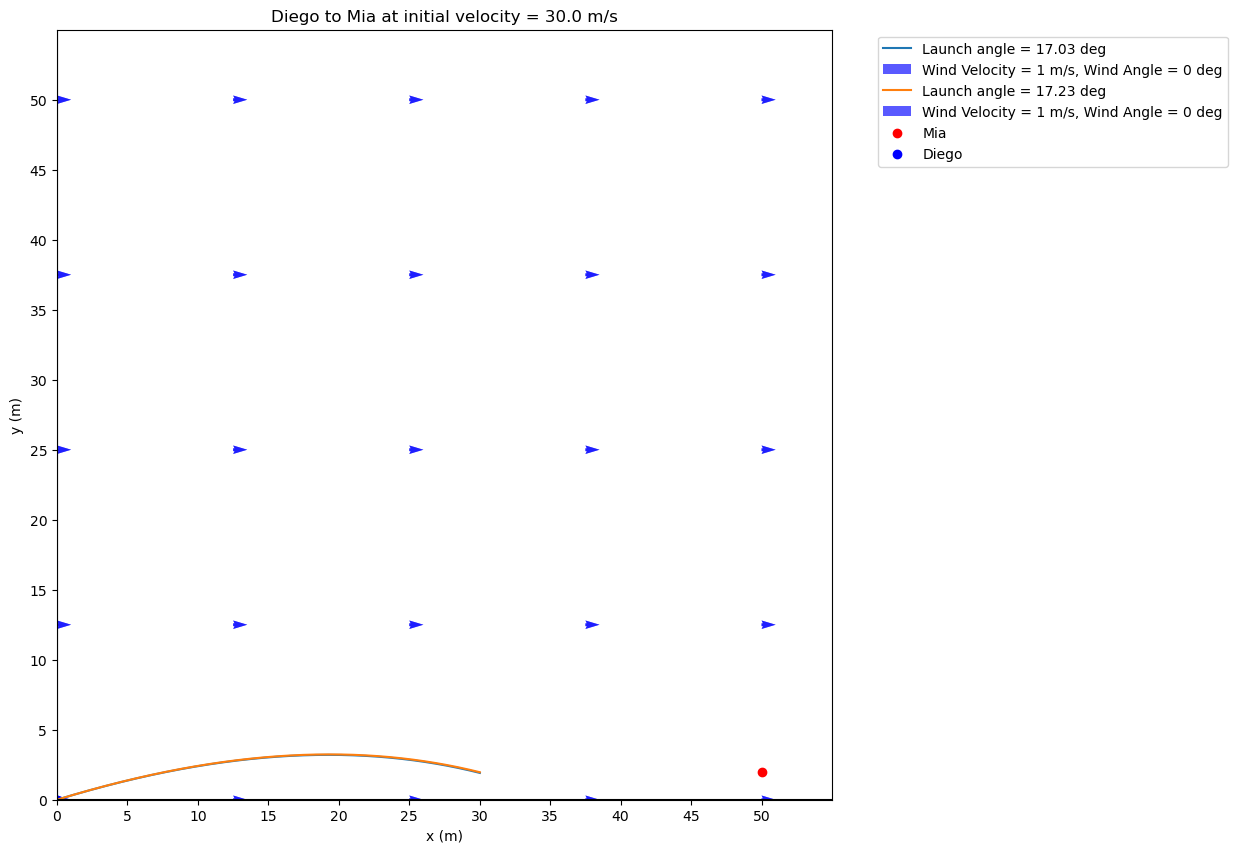

In [ ]:
plot_new(x,y,angles,50 ,2,1,0,xlim = 50,ylim = 50)

In [ ]:
angles,x,y = new_find_launch_angle(x0 = 0, y0 = 0 ,target_x = 50, target_y = 2, v0=58.6, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=0, wind_angle=0, tolerance = 0.1,)


x_graph = 0.029287666495327314, y_graph = -2.452549050735759e-06
49.97071233350467
0.029287666495327314 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
abs(x_graph[-1]-target_x) > tolerance , angle = 0.0
x_graph = 1.1905621724836448, y_graph = -4.2316169881483825e-05
48.809437827516355
1.1905621724836448 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
abs(x_graph[-1]-target_x) > tolerance , angle = 0.09900990099009901
x_graph = 2.3606166022598734, y_graph = -9.284699520823472e-05
47.639383397740126
2.3606166022598734 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
abs(x_graph[-1]-target_x) > tolerance , angle = 0.19801980198019803
x_graph = 3.483022952835412, y_graph = -3.702249995321045e-05
46.51697704716459
3.483022952835412 50 0.1
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
abs(x_graph[-1]-target_x) > tolerance , angle = 0.29702970297029707
x_graph = 4.6145397376262185, y_graph = -0.000158768199

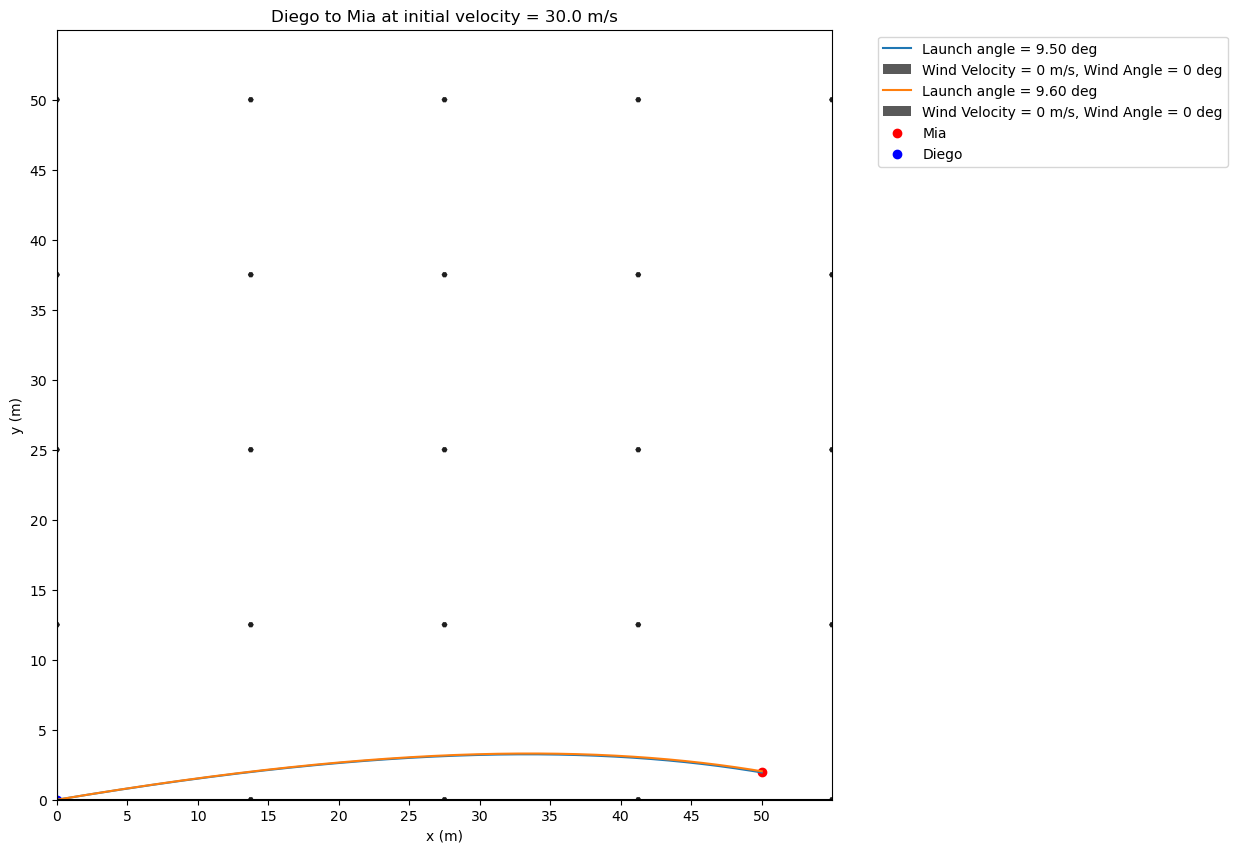

In [ ]:
plot_new(x,y,angles,50,2,0,0,xlim = 50,ylim = 50)

### Exercise 4

In [ ]:

def plot_new(x_graphs,y_graphs,valid_angles,target_x,target_y,wind_velocity,wind_angle,xlim = 120,ylim = 50,ticks = 5):
    plt.figure(figsize=(10,10))
    for x_graph,y_graph,launch_angle in zip(x_graphs,y_graphs,valid_angles):
        w = wind(wind_velocity,wind_angle)
        x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
        y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
        x_floor = int(np.floor(x_graph[-1]/5)*5)
        y_floor = int(np.floor(y_graph[-1]/5)*5)
        # create grid
        X = np.linspace(min(0,x_floor), max(xlim,x_ceiling), 5)
        Y = np.linspace(min(0,y_floor), max(ylim,y_ceiling), 5)
        Y, X = np.meshgrid(Y, X)
        U = np.ones_like(X)*w[0]
        V = np.ones_like(Y)*w[1]
        # plot wind vector field
        if wind_velocity == 0:
            wind_color = 'black'
        elif wind_velocity > 0:
            wind_color = 'blue'
        else:
            wind_color = 'red'
        # plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
        # alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
        plt.plot(x_graph, y_graph, label=f'Launch angle = {launch_angle:.2f} deg')

        plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
        alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
    plt.scatter(target_x, target_y, label='Goal Line', marker='o', color='red')
    plt.scatter(0, 0, label='Diego', marker='o', color='blue')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'Diego to Mia at initial velocity = {v0} m/s')
    plt.xlim(0,xlim+5)
    plt.ylim(0, ylim+5)
    plt.xticks(np.arange(0, xlim+5, step=ticks))
    plt.yticks(np.arange(0, ylim+5, step=ticks))
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.show()
    return




In [ ]:
tolerance = 1.22
wind_velocity = 0
wind_angle = 0

velocities  = np.linspace(0,58.6,int(58.6/tolerance))

for v0 in velocities:
    valid_angles,x_graphs,y_graphs = new_find_launch_angle(x0 = 0, y0 = 0 ,target_x = 12.22, target_y = 0, v0=v0, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=wind_velocity, wind_angle=wind_angle, tolerance = tolerance)
    if len(valid_angles) == 0:
        print(f'v0 = {v0} m/s, no solutions')
        continue
    elif len(valid_angles) >= 1:
        valid_angles = valid_angles[:1]
        x_graphs = x_graphs[:1]
        y_graphs = y_graphs[:1]
        
        # print(f'hello world: \t {x_graphs[0][-1]}')
        #plot_new(x_graphs,y_graphs,valid_angles,11,0,0,0,xlim = 11,ylim=20,ticks = 1) 
        print(f'A good spoon shot from this distance given the conditions would be {v0} m/s at {valid_angles}º')
        print(f'x_graphs = {x_graphs}, y_graphs = {y_graphs}')
        break




/var/folders/y8/3577zp2906160w47dbt5wlwm0000gn/T/ipykernel_1683/2691131806.py:92: RuntimeWarning: invalid value encountered in divide
  unit_v = v/v_magnitude
/var/folders/y8/3577zp2906160w47dbt5wlwm0000gn/T/ipykernel_1683/2691131806.py:153: RuntimeWarning: invalid value encountered in divide
  unit_v = rel_v/v_magnitude


x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs
x_graph = nan, y_graph = nan
nan graphs


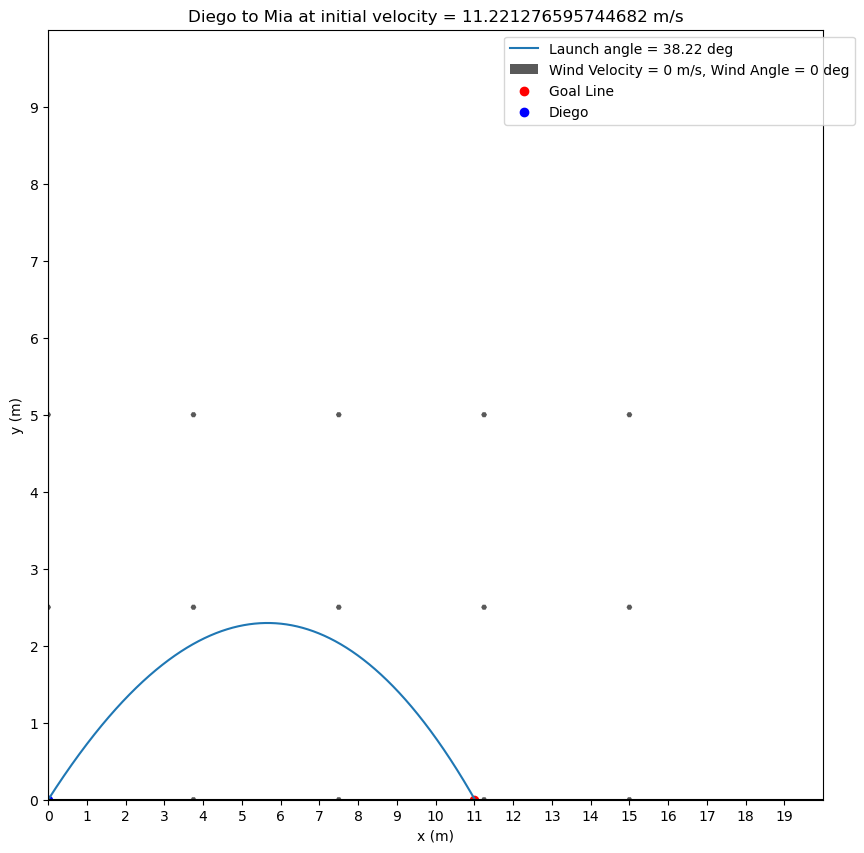

[38.21917808219178]


In [ ]:

plot_new(x_graphs,y_graphs,valid_angles,11,0,0,0,xlim = 15,ylim=5,ticks = 1)
print(valid_angles)

In [ ]:
9.9-11 = -1.1
abs -1.1 = 1.1
1.1 > 0.1

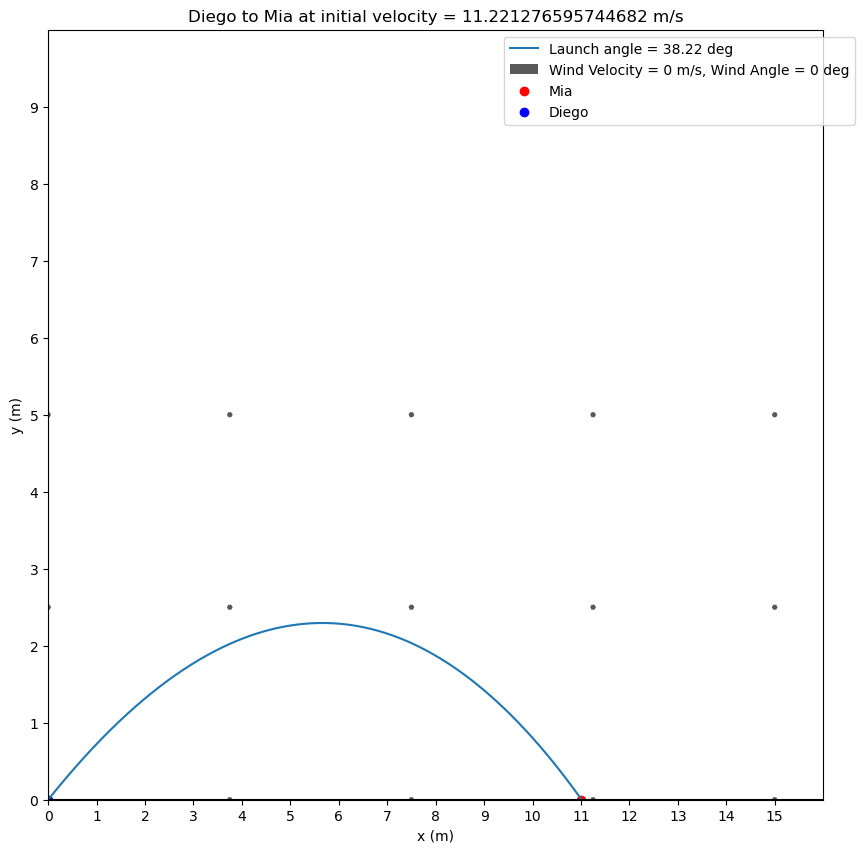

[38.21917808219178]


In [ ]:

plot_new(x_graphs,y_graphs,valid_angles,11,0,0,0,xlim = 11,ylim=5,ticks = 1)
print(valid_angles)

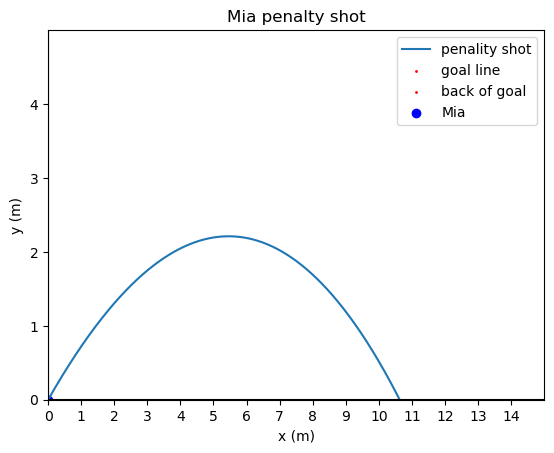

In [ ]:

x,y = soccer_ball_trajectory(0,0,11,38.22,ball_and_environment_properties)
plt.plot(x,y,label = 'penality shot')
plt.scatter(11,0,label = 'goal line', marker='o', color='red',s = 1)
plt.scatter(13.44,0,label = 'back of goal', marker='o', color='red',s = 1)
plt.scatter(0,0, label = 'Mia', marker='o', color='blue')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Mia penalty shot')
plt.xlim(0, 15)
plt.ylim(0, 5)
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0,5, step=1))
plt.legend()
plt.show()

In [ ]:
def soccer_ball_trajectory_new(
        x0 = 0,
        y0 = 0,
        target_x = 30,
        target_y = 2,
        v0 = 30,
        launch_angle = 30,
        ball_and_environment_properties= ball_and_environment_properties,
        wind_velocity = 0,
        wind_angle = 0,
        tolerance = 0.01):
    # Soccer ball and environment constants
    diameter = ball_and_environment_properties['diameter']
    mass = ball_and_environment_properties['mass']
    density_air = ball_and_environment_properties['density_air']
    Cd = ball_and_environment_properties['Cd']
    g = ball_and_environment_properties['g']
    A = np.pi*(diameter/2)**2   # Cross-sectional area of soccer ball

    # Initial Conditions
    nstep = 100000
    t = np.linspace(0., 60., nstep)
    alpha = 0.5*Cd*A*density_air
    w = wind(wind_velocity,wind_angle)
    v = velocity(v0,launch_angle)
    v_magnitude = velocity_magnitude(v)
    unit_v = velocity_unit_vector(v,v_magnitude)
    a = acceleration(g)
    F = force(a,mass)
    F_drag = drag_force(alpha,v_magnitude,unit_v)
    F_net = net_force(F,F_drag)
    x = x0
    y = y0
    x_graph = np.zeros_like(t)
    y_graph = np.zeros_like(t)
    x_graph[0] = x
    y_graph[0] = y
    i = 0
    while y_graph[i] >= 0 and x_graph[i] <= target_x:    
        rel_v = [v[0]-w[0], v[1]-w[1]]
        v_magnitude = np.sqrt(rel_v[0]**2+rel_v[1]**2)
        unit_v = rel_v/v_magnitude
        F_drag = alpha*(v_magnitude**2)*-unit_v
        F = [a[0]*mass, a[1]*mass]
        F_net = [F[0]+F_drag[0], F[1]+F_drag[1]]
        v = [v[0]+(F_net[0]/mass)*dt, v[1]+(F_net[1]/mass)*dt]
        x = x + v[0]*dt
        y = y + v[1]*dt
        if x >= target_x:
            x_graph[i+1] = x
            y_graph[i+1] = y
            break
        if y == 2:
            y_graph[i+1] = y
            break
        if y<=y_graph[i-1] and y < target_y: 
            y_graph[i+1] = y
            break
        x_graph[i+1] = x
        y_graph[i+1] = y
        i+=1
    x_graph = x_graph[:i]
    y_graph = y_graph[:i]
    if len(x_graph) == 0:
        msg = str("miss pass")
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance
    if abs(x_graph[-1]-target_x) > tolerance:
        msg = str("miss pass")
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 
    elif abs(y_graph[-1]-target_y) > tolerance:
        msg = str("miss pass")
        return msg, x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 
    return x_graph,y_graph,x0,y0,target_x,target_y ,v0,launch_angle,ball_and_environment_properties,wind_velocity ,wind_angle ,tolerance 

def new_find_launch_angle(x0 = 0, 
                          y0 = 0, 
                          target_x = 30,
                          target_y = 2, 
                          v0=30, 
                          ball_and_environment_properties= ball_and_environment_properties, 
                          wind_velocity=0, 
                          wind_angle=0, 
                          tolerance = 0.1):
    
    # Iterate over a range of launch angles (e.g., from 10 to 80 degrees)
    valid_angles = []
    angles = np.linspace(0,90,int(91/tolerance))
    plt.figure(figsize=(10,10))

    for angle in angles:
        results = soccer_ball_trajectory_new(x0 = x0, y0 = y0,target_x=target_x,target_y=target_y, v0=v0, launch_angle=angle, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=wind_velocity, wind_angle=wind_angle, tolerance = tolerance)
        #if results[0] is a string
        if isinstance(results[0],str):
            x_graph, y_graph = results[1], results[2]
            # print(results[0])
        else:
            x_graph, y_graph, launch_angle = results[0], results[1], results [7]
            if y_graph[-1]>y_graph[-2]:
                print(f"The ball launched at {v0} m/s at {angle}º will reach Mia's head, but not on it's descent")
                continue
            else:
                # if there is an angle in valid_angles that is within 0.1 deg of the current angle, then skip
                if len(valid_angles)>0:
                    if any(abs(angle-valid_angles)<tolerance):
                        continue
                valid_angles.append(angle) 
                w = wind(wind_velocity,wind_angle)
                x_ceiling = int(np.ceil(x_graph[-1]/5)*5)
                y_ceiling = int(np.ceil(y_graph[-1]/5)*5)
                x_floor = int(np.floor(x_graph[-1]/5)*5)
                y_floor = int(np.floor(y_graph[-1]/5)*5)
                # create grid
                X = np.linspace(min(0,x_floor), max(50,x_ceiling), 5)
                Y = np.linspace(min(0,y_floor), max(40,y_ceiling), 5)
                Y, X = np.meshgrid(Y, X)
                U = np.ones_like(X)*w[0]
                V = np.ones_like(Y)*w[1]
                # plot wind vector field
                if wind_velocity == 0:
                    wind_color = 'black'
                elif wind_velocity > 0:
                    wind_color = 'blue'
                else:
                    wind_color = 'red'

                plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, 
                alpha = 0.65, color = wind_color, label = f'Wind Velocity = {wind_velocity} m/s, Wind Angle = {wind_angle} deg')
                plt.plot(x_graph, y_graph, label=f'Launch angle = {launch_angle:.2f} deg')
    plt.scatter(target_x, target_y, label='Mia', marker='o', color='red')
    plt.scatter(0, 0, label='Diego', marker='o', color='blue')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Diego to Mia at initial velocity = {v0} m/s')
    plt.xlim(0, max(50, target_x + 5))
    plt.ylim(0, max(50, max(y_graph) + 5))
    plt.xticks(np.arange(0, max(50, target_x + 5), step=5))
    plt.yticks(np.arange(0, max(50, max(y_graph) + 5), step=5))
    plt.legend()
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.show()

    print(f"there are roughly {valid_angles} valid angles that hit Mia's head descending")

    return

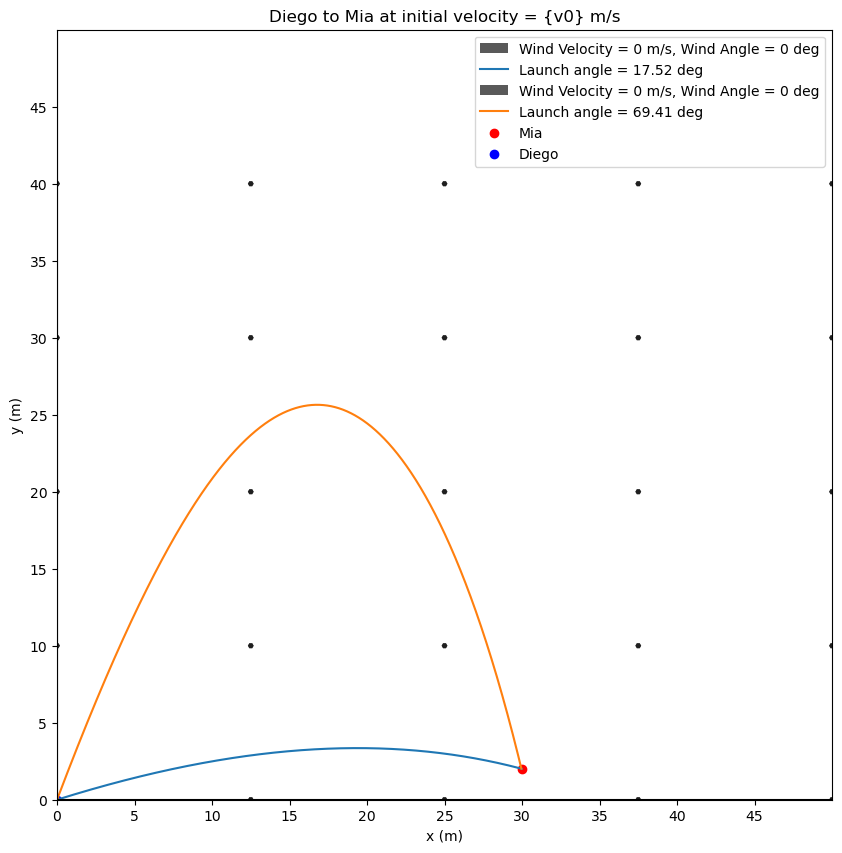

there are roughly [17.524752475247524, 69.40594059405942] valid angles that hit Mia's head descending


In [ ]:
new_find_launch_angle(x0 = 0, y0 = 0 ,target_x = 30, target_y = 2, v0=30, ball_and_environment_properties= ball_and_environment_properties, wind_velocity=0, wind_angle=0, tolerance = 0.1,)